In [62]:
!pip install seaborn
!pip install tabulate


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import pearsonr
from scipy.stats import f_oneway  
from IPython.display import display
from scipy.stats import ttest_ind


In [64]:
sales_df = pd.read_csv('/Users/nguyenthuan/Sales_Data.csv')
promo_df = pd.read_csv('/Users/nguyenthuan/Promotion.csv')
sales_df


Unnamed: 0        Date    New_Sales
0             0  1995-01-01   801.087735
1             1  1995-02-01  1109.019328
2             2  1995-03-01   876.561180
3             3  1995-04-01   890.258213
4             4  1995-05-01   774.015130
..          ...         ...          ...
355         355  2024-08-01  1607.835902
356         356  2024-09-01  1644.318122
357         357  2024-10-01  1662.271517
358         358  2024-11-01  2884.201446
359         359  2024-12-01  1870.375540

[360 rows x 3 columns]

In [65]:
promo_df

Promo_ID Active_Month Promo_Type  Budget_USD
0      P001      1995-02     Bundle        7000
1      P002      1995-08     Bundle       22000
2      P003      1995-12   Discount        6000
3      P004      1997-10     Bundle       20000
4      P005      1997-11   Discount        5000
5      P006      1998-08   Discount       19000
6      P007      1999-03     Bundle       21000
7      P008      1999-05     Bundle        8000
8      P009      1999-06   Discount        7000
9      P010      1999-08   Discount       21000
10     P011      2000-10     Bundle       11000
11     P012      2001-09     Bundle        7000
12     P013      2002-05   Cashback        8000
13     P014      2003-09     Bundle       16000
14     P015      2004-05   Discount       18000
15     P016      2004-08   Discount       16000
16     P017      2004-11     Bundle       11000
17     P018      2005-02     Bundle       21000
18     P019      2005-08   Discount       12000
19     P020      2006-03   Cashback        6000
20     P021      2006-08   Discount       23000
21     P022      2006-09     Bundle       17000
22     P023      2007-07     Bundle       24000
23     P024      2007-11   Discount       21000
24     P025      2009-11   Discount        8000
25     P026      2010-03     Bundle       12000
26     P027      2010-04   Discount       16000
27     P028      2010-12   Discount       11000
28     P029      2011-01   Discount       11000
29     P030      2011-06   Discount       17000
30     P031      2011-07     Bundle       22000
31     P032      2011-12     Bundle        8000
32     P033      2013-11     Bundle       20000
33     P034      2014-01     Bundle       13000
34     P035      2015-01   Discount       20000
35     P036      2015-02     Bundle       18000
36     P037      2015-03     Bundle        6000
37     P038      2015-06   Discount       12000
38     P039      2015-08     Bundle        6000
39     P040      2015-09   Discount        8000
40     P041      2015-10     Bundle       11000
41     P042      2016-01   Discount       17000
42     P043      2016-05     Bundle       21000
43     P044      2016-10   Discount       18000
44     P045      2017-01     Bundle       11000
45     P046      2017-09   Discount       13000
46     P047      2017-10     Bundle       17000
47     P048      2018-05     Bundle       22000
48     P049      2020-06   Discount        6000
49     P050      2021-02     Bundle        6000
50     P051      2022-01     Bundle       19000
51     P052      2023-01     Bundle       23000
52     P053      2024-04   Cashback       19000
53     P054      2024-11   Discount       23000

## **Understand the Dataset**

In [66]:
def check_df_types(df):
    print("== Column Types ==")
    print(df.dtypes)
    print("\n== Number of unique values per column ==")
    print(df.nunique())
    print("\n== Null values per column ==")
    print(df.isnull().sum())

In [67]:
check_df_types(promo_df)

== Column Types ==
Promo_ID        object
Active_Month    object
Promo_Type      object
Budget_USD       int64
dtype: object

== Number of unique values per column ==
Promo_ID        54
Active_Month    54
Promo_Type       3
Budget_USD      16
dtype: int64

== Null values per column ==
Promo_ID        0
Active_Month    0
Promo_Type      0
Budget_USD      0
dtype: int64


In [68]:
check_df_types(sales_df)

== Column Types ==
Unnamed: 0      int64
Date           object
New_Sales     float64
dtype: object

== Number of unique values per column ==
Unnamed: 0    360
Date          360
New_Sales     360
dtype: int64

== Null values per column ==
Unnamed: 0    0
Date          0
New_Sales     0
dtype: int64


**T√ìM L·∫†I**

1. ƒê·ªëi v·ªõi Sales_df, date ƒëang d·∫°ng chu·ªói ph·∫£i chuy·ªÉn th√†nh datetime, t·∫°o th√™m c·ªôt Year, Month (d·ªÉ h·ªó tr·ª£ ph√¢n t√≠ch theo nƒÉm, m√πa, v·ª•), YearMonth(ƒë·ªÉ g·ªôp vs d·ªØ li·ªáu promo_df)
2. ƒê·ªëi v·ªõi promo_df: active_month ph·∫£i chuy·ªÉn v·ªÅ date time, ƒë·ªìng th·ªùi t·∫°o th√™m c·ªôt YearMonth


In [69]:
#clean sales
#Chuy·ªÉn c·ªôt Date t·ª´ ki·ªÉu chu·ªói (object) sang ƒë·ªãnh d·∫°ng th·ªùi gian
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
#T·∫°o c·ªôt m·ªõi Year ch·ª©a nƒÉm (yyyy) t·ª´ c·ªôt Date
sales_df['Year'] = sales_df['Date'].dt.year
#T·∫°o c·ªôt m·ªõi Month ch·ª©a th√°ng (mm) t·ª´ c·ªôt Date
sales_df['Month'] = sales_df['Date'].dt.month
# T·∫°o c·ªôt YearMonth d·∫°ng YYYY-MM t·ª´ Date, ƒë√¢y l√† kho√° th·ªùi gian ch√≠nh ƒë·ªÉ merged v·ªõi promo_df
sales_df['YearMonth'] = sales_df['Date'].dt.to_period('M').astype(str)
sales_df

Unnamed: 0       Date    New_Sales  Year  Month YearMonth
0             0 1995-01-01   801.087735  1995      1   1995-01
1             1 1995-02-01  1109.019328  1995      2   1995-02
2             2 1995-03-01   876.561180  1995      3   1995-03
3             3 1995-04-01   890.258213  1995      4   1995-04
4             4 1995-05-01   774.015130  1995      5   1995-05
..          ...        ...          ...   ...    ...       ...
355         355 2024-08-01  1607.835902  2024      8   2024-08
356         356 2024-09-01  1644.318122  2024      9   2024-09
357         357 2024-10-01  1662.271517  2024     10   2024-10
358         358 2024-11-01  2884.201446  2024     11   2024-11
359         359 2024-12-01  1870.375540  2024     12   2024-12

[360 rows x 6 columns]

In [70]:
#Chuy·ªÉn c·ªôt Active_Month t·ª´ d·∫°ng chu·ªói (object) ‚Üí v·ªÅ ƒë·ªãnh d·∫°ng th·ªùi gian chu·∫©n datetime.
promo_df['Active_Month'] = pd.to_datetime(promo_df['Active_Month'])
#ƒê·ªìng b·ªô ƒë·ªãnh d·∫°ng th·ªùi gian v·ªõi sales_df['YearMonth']
promo_df['YearMonth'] = promo_df['Active_Month'].dt.to_period('M').astype(str)
promo_df

Promo_ID Active_Month Promo_Type  Budget_USD YearMonth
0      P001   1995-02-01     Bundle        7000   1995-02
1      P002   1995-08-01     Bundle       22000   1995-08
2      P003   1995-12-01   Discount        6000   1995-12
3      P004   1997-10-01     Bundle       20000   1997-10
4      P005   1997-11-01   Discount        5000   1997-11
5      P006   1998-08-01   Discount       19000   1998-08
6      P007   1999-03-01     Bundle       21000   1999-03
7      P008   1999-05-01     Bundle        8000   1999-05
8      P009   1999-06-01   Discount        7000   1999-06
9      P010   1999-08-01   Discount       21000   1999-08
10     P011   2000-10-01     Bundle       11000   2000-10
11     P012   2001-09-01     Bundle        7000   2001-09
12     P013   2002-05-01   Cashback        8000   2002-05
13     P014   2003-09-01     Bundle       16000   2003-09
14     P015   2004-05-01   Discount       18000   2004-05
15     P016   2004-08-01   Discount       16000   2004-08
16     P017   2004-11-01     Bundle       11000   2004-11
17     P018   2005-02-01     Bundle       21000   2005-02
18     P019   2005-08-01   Discount       12000   2005-08
19     P020   2006-03-01   Cashback        6000   2006-03
20     P021   2006-08-01   Discount       23000   2006-08
21     P022   2006-09-01     Bundle       17000   2006-09
22     P023   2007-07-01     Bundle       24000   2007-07
23     P024   2007-11-01   Discount       21000   2007-11
24     P025   2009-11-01   Discount        8000   2009-11
25     P026   2010-03-01     Bundle       12000   2010-03
26     P027   2010-04-01   Discount       16000   2010-04
27     P028   2010-12-01   Discount       11000   2010-12
28     P029   2011-01-01   Discount       11000   2011-01
29     P030   2011-06-01   Discount       17000   2011-06
30     P031   2011-07-01     Bundle       22000   2011-07
31     P032   2011-12-01     Bundle        8000   2011-12
32     P033   2013-11-01     Bundle       20000   2013-11
33     P034   2014-01-01     Bundle       13000   2014-01
34     P035   2015-01-01   Discount       20000   2015-01
35     P036   2015-02-01     Bundle       18000   2015-02
36     P037   2015-03-01     Bundle        6000   2015-03
37     P038   2015-06-01   Discount       12000   2015-06
38     P039   2015-08-01     Bundle        6000   2015-08
39     P040   2015-09-01   Discount        8000   2015-09
40     P041   2015-10-01     Bundle       11000   2015-10
41     P042   2016-01-01   Discount       17000   2016-01
42     P043   2016-05-01     Bundle       21000   2016-05
43     P044   2016-10-01   Discount       18000   2016-10
44     P045   2017-01-01     Bundle       11000   2017-01
45     P046   2017-09-01   Discount       13000   2017-09
46     P047   2017-10-01     Bundle       17000   2017-10
47     P048   2018-05-01     Bundle       22000   2018-05
48     P049   2020-06-01   Discount        6000   2020-06
49     P050   2021-02-01     Bundle        6000   2021-02
50     P051   2022-01-01     Bundle       19000   2022-01
51     P052   2023-01-01     Bundle       23000   2023-01
52     P053   2024-04-01   Cashback       19000   2024-04
53     P054   2024-11-01   Discount       23000   2024-11

In [71]:
merged_df = pd.merge(sales_df, promo_df, on='YearMonth', how='left')

# X·ª≠ l√Ω c√°c gi√° tr·ªã NaN sau khi merge
merged_df['Promo_ID'] = merged_df['Promo_ID'].fillna('None')
merged_df['Promo_Type'] = merged_df['Promo_Type'].fillna('Non_Promo')
merged_df['Budget_USD'] = merged_df['Budget_USD'].fillna(0)

# Xo√° c·ªôt d∆∞ n·∫øu c√≥
merged_df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

merged_df["Date"] = pd.to_datetime(merged_df["Date"])  # n·∫øu ch∆∞a convert
merged_df.set_index("Date", inplace=True)

merged_df

New_Sales  Year  Month YearMonth Promo_ID Active_Month  \
Date                                                                   
1995-01-01   801.087735  1995      1   1995-01     None          NaT   
1995-02-01  1109.019328  1995      2   1995-02     P001   1995-02-01   
1995-03-01   876.561180  1995      3   1995-03     None          NaT   
1995-04-01   890.258213  1995      4   1995-04     None          NaT   
1995-05-01   774.015130  1995      5   1995-05     None          NaT   
...                 ...   ...    ...       ...      ...          ...   
2024-08-01  1607.835902  2024      8   2024-08     None          NaT   
2024-09-01  1644.318122  2024      9   2024-09     None          NaT   
2024-10-01  1662.271517  2024     10   2024-10     None          NaT   
2024-11-01  2884.201446  2024     11   2024-11     P054   2024-11-01   
2024-12-01  1870.375540  2024     12   2024-12     None          NaT   

           Promo_Type  Budget_USD  
Date                               
1995-01-01  Non_Promo         0.0  
1995-02-01     Bundle      7000.0  
1995-03-01  Non_Promo         0.0  
1995-04-01  Non_Promo         0.0  
1995-05-01  Non_Promo         0.0  
...               ...         ...  
2024-08-01  Non_Promo         0.0  
2024-09-01  Non_Promo         0.0  
2024-10-01  Non_Promo         0.0  
2024-11-01   Discount     23000.0  
2024-12-01  Non_Promo         0.0  

[360 rows x 8 columns]

In [72]:
merged_df.to_csv("merged_df_export.csv", index=False)


In [73]:
def check_df_types(df):

    result = []

    for col in df.columns:
        dtype = df[col].dtype

        # Ph√¢n lo·∫°i ki·ªÉu d·ªØ li·ªáu ch√≠nh
        if pd.api.types.is_numeric_dtype(df[col]):
            general_type = "Numeric"
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            general_type = "Datetime"
        elif pd.api.types.is_string_dtype(df[col]):
            general_type = "String"
        elif pd.api.types.is_categorical_dtype(df[col]):
            general_type = "Category"
        elif pd.api.types.is_bool_dtype(df[col]):
            general_type = "Boolean"
        else:
            general_type = "Other"

        result.append({
            'Column': col,
            'Pandas dtype': str(dtype),
            'General Type': general_type,
            'Nulls': df[col].isnull().sum(),
            'Unique Values': df[col].nunique()
        })

    return pd.DataFrame(result)
type_summary = check_df_types(merged_df)
type_summary

Column    Pandas dtype General Type  Nulls  Unique Values
0     New_Sales         float64      Numeric      0            360
1          Year           int32      Numeric      0             30
2         Month           int32      Numeric      0             12
3     YearMonth          object       String      0            360
4      Promo_ID          object       String      0             55
5  Active_Month  datetime64[ns]     Datetime    306             54
6    Promo_Type          object       String      0              4
7    Budget_USD         float64      Numeric      0             17

## **Summarize the Data**

In [74]:
def summarize_numerical_columns(df, exclude_cols=['Year', 'Month'], percentiles=[0.25, 0.5, 0.75]):
    """
    T√≥m t·∫Øt th·ªëng k√™ cho c√°c c·ªôt s·ªë, lo·∫°i tr·ª´ c√°c c·ªôt ƒë·ªãnh danh nh∆∞ 'Year', 'Month'
    """
    numeric_cols = df.select_dtypes(include='number').drop(columns=exclude_cols, errors='ignore')
    summary = pd.DataFrame(index=numeric_cols.columns)

    summary['Mean'] = numeric_cols.mean()
    summary['Median'] = numeric_cols.median()
    summary['Mode'] = numeric_cols.mode().iloc[0]
    summary['Std'] = numeric_cols.std()
    summary['Variance'] = numeric_cols.var()
    summary['Min'] = numeric_cols.min()
    summary['Max'] = numeric_cols.max()

    for p in percentiles:
        summary[f'Percentile_{int(p*100)}'] = numeric_cols.quantile(p)

    return summary.round(2)



In [75]:
summary_stats = summarize_numerical_columns(merged_df)
summary_stats.style.format("{:.2f}").set_caption("Summary Statistics").background_gradient(cmap='Blues')


## **Univariate Analysis**

In [76]:

def univariate_sales_and_budget_analysis(df, bins=30):
    """
    Hi·ªÉn th·ªã:
    1. Distribution c·ªßa New_Sales (t·∫•t c·∫£ th√°ng)
    2. Distribution c·ªßa Budget_USD (ch·ªâ c√°c th√°ng c√≥ promo)
    """
    
    # --- 1. New_Sales (to√†n b·ªô) ---
    col_sales = 'New_Sales'
    print(f"\n T·ªïng quan: {col_sales} (To√†n b·ªô d·ªØ li·ªáu)")
    print("-" * 50)
    print(f"Mean: {df[col_sales].mean():.2f}")
    print(f"Median: {df[col_sales].median():.2f}")
    print(f"Std: {df[col_sales].std():.2f}")
    print(f"Min: {df[col_sales].min():.2f}")
    print(f"Max: {df[col_sales].max():.2f}")
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col_sales], bins=bins, kde=True, color='steelblue')
    plt.title('Distribution of New_Sales')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col_sales], color='salmon')
    plt.title('Boxplot of New_Sales')
    plt.tight_layout()
    plt.show()

    # --- 2. Budget_USD (ch·ªâ th√°ng c√≥ promo) ---
    promo_df = df[df['Promo_Type'] != 'Non_Promo']
    col_budget = 'Budget_USD'
    
    print(f"\nT·ªïng quan: {col_budget} (Ch·ªâ th√°ng c√≥ promo)")
    print("-" * 50)
    print(f"Mean: {promo_df[col_budget].mean():.2f}")
    print(f"Median: {promo_df[col_budget].median():.2f}")
    print(f"Std: {promo_df[col_budget].std():.2f}")
    print(f"Min: {promo_df[col_budget].min():.2f}")
    print(f"Max: {promo_df[col_budget].max():.2f}")
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(promo_df[col_budget], bins=bins, kde=True, color='green')
    plt.title('Distribution of Budget (Promo Only)')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=promo_df[col_budget], color='orange')
    plt.title('Boxplot of Budget (Promo Only)')
    plt.tight_layout()
    plt.show()





 T·ªïng quan: New_Sales (To√†n b·ªô d·ªØ li·ªáu)
--------------------------------------------------
Mean: 1248.31
Median: 1184.04
Std: 427.47
Min: 555.65
Max: 3404.43


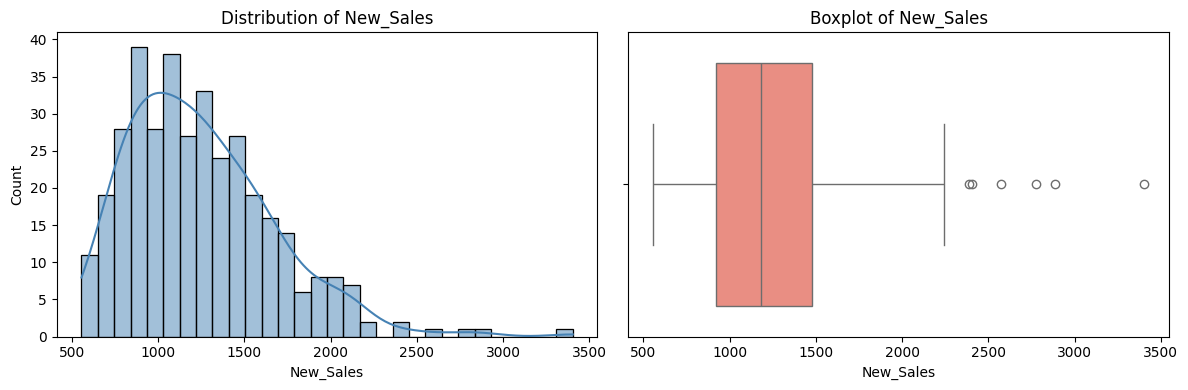


T·ªïng quan: Budget_USD (Ch·ªâ th√°ng c√≥ promo)
--------------------------------------------------
Mean: 14462.96
Median: 16000.00
Std: 5999.10
Min: 5000.00
Max: 24000.00


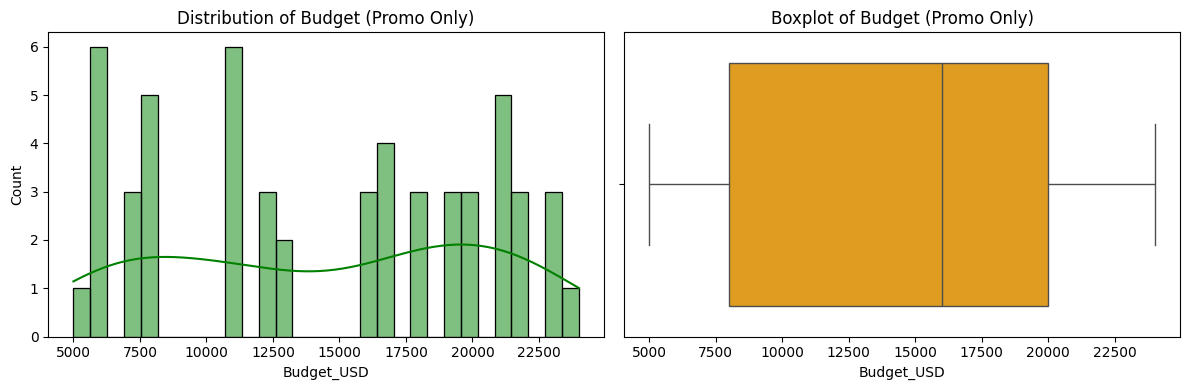

In [77]:
univariate_sales_and_budget_analysis(merged_df)


In [78]:
import pandas as pd

# ƒê·∫£m b·∫£o Budget l√† s·ªë
merged_df['Budget_USD'] = pd.to_numeric(merged_df['Budget_USD'], errors='coerce')

# G·ªôp theo nƒÉm v√† t√≠nh t·ªïng ng√¢n s√°ch m·ªói nƒÉm
annual_budget = (
    merged_df.groupby('Year')['Budget_USD']
    .sum()
    .reset_index()
    .rename(columns={'Budget_USD': 'Total_Budget'})
)

# T√≠nh trung b√¨nh ng√¢n s√°ch 1 nƒÉm
avg_annual_budget = annual_budget['Total_Budget'].mean()

# In k·∫øt qu·∫£
print(f"Trung b√¨nh ng√¢n s√°ch khuy·∫øn m√£i m·ªói nƒÉm: {avg_annual_budget:,.2f} USD")


Trung b√¨nh ng√¢n s√°ch khuy·∫øn m√£i m·ªói nƒÉm: 26,033.33 USD


In [79]:
import pandas as pd

# L·ªçc ch·ªâ c√°c d√≤ng c√≥ khuy·∫øn m√£i th·ª±c s·ª±
promo_df = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()

# ƒê·∫£m b·∫£o Budget l√† s·ªë
promo_df['Budget_USD'] = pd.to_numeric(promo_df['Budget_USD'], errors='coerce')

# Lo·∫°i b·ªè nh·ªØng d√≤ng budget b·ªã null ho·∫∑c b·∫±ng 0
valid_promos = promo_df[promo_df['Budget_USD'] > 0]

# T√≠nh ng√¢n s√°ch trung b√¨nh m·ªói ch∆∞∆°ng tr√¨nh
avg_budget_per_promo = valid_promos['Budget_USD'].mean()

# In k·∫øt qu·∫£
print(f"Ng√¢n s√°ch trung b√¨nh m·ªói ch∆∞∆°ng tr√¨nh khuy·∫øn m√£i: {avg_budget_per_promo:,.2f} USD")


Ng√¢n s√°ch trung b√¨nh m·ªói ch∆∞∆°ng tr√¨nh khuy·∫øn m√£i: 14,462.96 USD


In [80]:

df = merged_df.copy()

# T√≠nh IQR
Q1 = df['New_Sales'].quantile(0.25)
Q3 = df['New_Sales'].quantile(0.75)
IQR = Q3 - Q1

# X√°c ƒë·ªãnh ng∆∞·ª°ng
upper_bound = Q3 + 1.5 * IQR

# L·ªçc c√°c outliers (ch·ªâ x√©t outlier ph√≠a tr√™n v√¨ doanh s·ªë cao)
outliers = df[df['New_Sales'] > upper_bound].copy()

# Th√™m Label ƒë·ªÉ d·ªÖ nh√¨n
outliers['Label'] = outliers['Year'].astype(str) + '-' + outliers['Month'].astype(str).str.zfill(2)

# Hi·ªÉn th·ªã c√°c c·ªôt quan tr·ªçng
outlier_display = outliers[['Label', 'New_Sales', 'Promo_Type']]
print("C√°c outlier (doanh s·ªë cao b·∫•t th∆∞·ªùng):")
print(outlier_display.sort_values(by='New_Sales', ascending=False))


C√°c outlier (doanh s·ªë cao b·∫•t th∆∞·ªùng):
              Label    New_Sales Promo_Type
Date                                       
2024-04-01  2024-04  3404.428595   Cashback
2024-11-01  2024-11  2884.201446   Discount
2023-01-01  2023-01  2778.822869     Bundle
2022-01-01  2022-01  2574.493721     Bundle
2021-02-01  2021-02  2405.110869     Bundle
2016-01-01  2016-01  2388.768164   Discount


/var/folders/rh/0r4k_tw56sd9fl7wsl3tjh1m0000gn/T/ipykernel_45297/455494239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=merged_df, x='Promo_Type', palette='Set2')


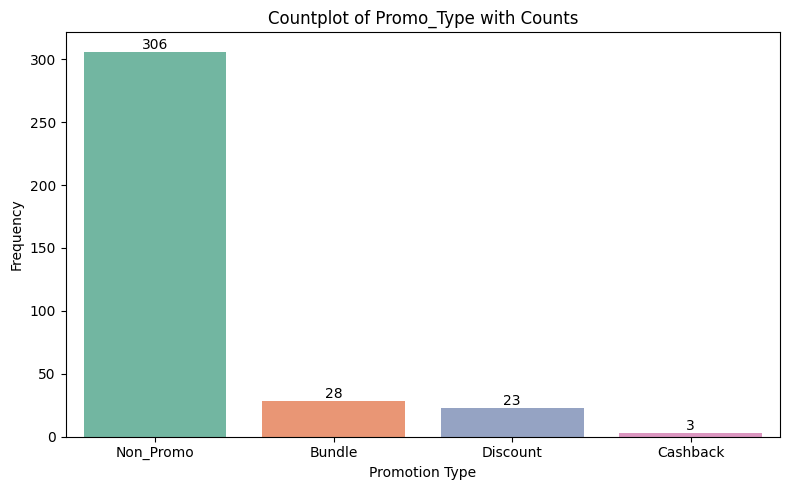

In [81]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=merged_df, x='Promo_Type', palette='Set2')

# Th√™m s·ªë ƒë·∫øm tr√™n m·ªói c·ªôt
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
            (p.get_x() + p.get_width() / 2., height), 
            ha='center', va='bottom', fontsize=10)

plt.title('Countplot of Promo_Type with Counts')
plt.xlabel('Promotion Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


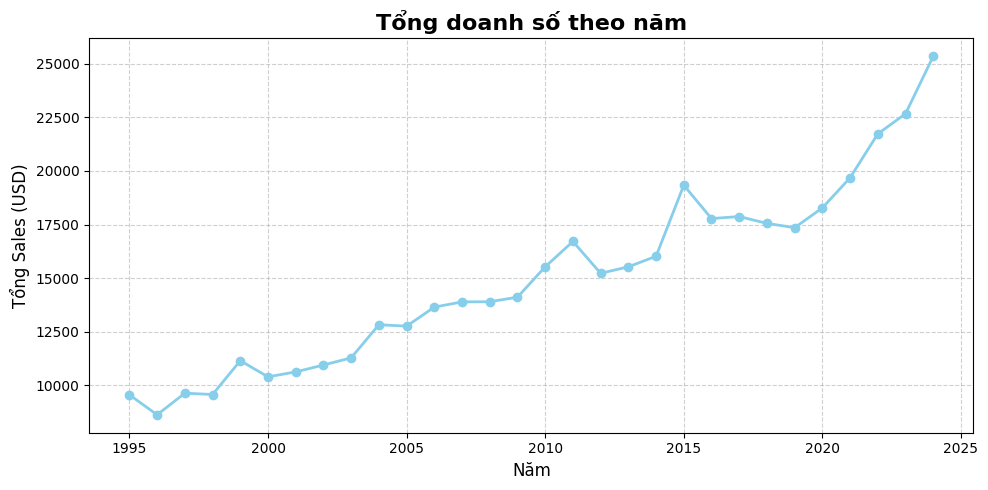

In [82]:
# T·∫°o d·ªØ li·ªáu
yearly_sales = merged_df.groupby('Year')['New_Sales'].sum()
# T·∫°o figure
plt.figure(figsize=(10, 5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.title("T·ªïng doanh s·ªë theo nƒÉm", fontsize=16, fontweight='bold')
plt.xlabel("NƒÉm", fontsize=12)
plt.ylabel("T·ªïng Sales (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


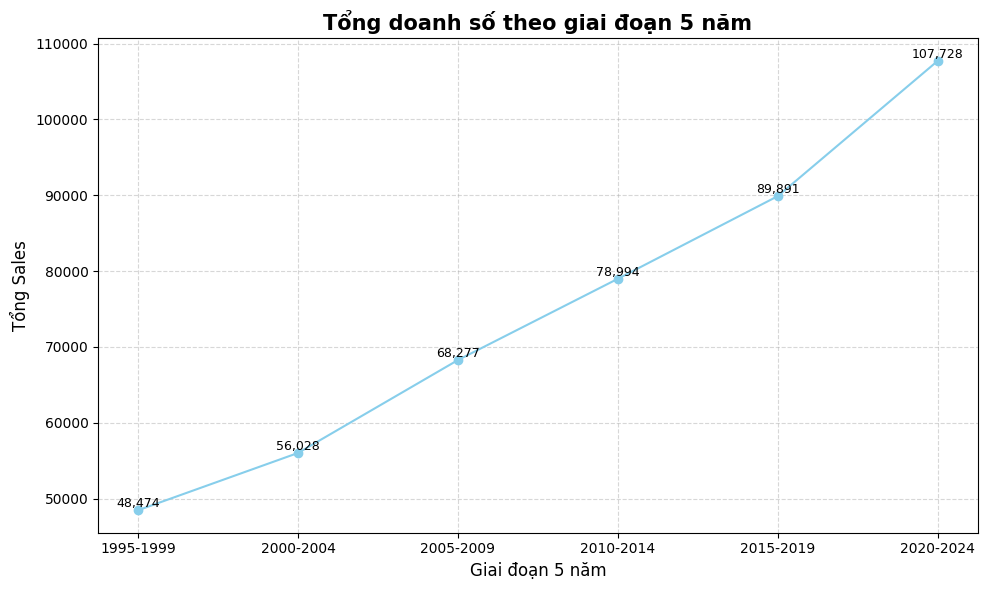

In [83]:
# B∆∞·ªõc 1: T·∫°o nh√£n giai ƒëo·∫°n 5 nƒÉm
merged_df['Year_Group'] = (merged_df['Year'] // 5) * 5
merged_df['Year_Group_Label'] = merged_df['Year_Group'].astype(str) + '-' + (merged_df['Year_Group'] + 4).astype(str)

# B∆∞·ªõc 2: T√≠nh t·ªïng doanh s·ªë theo giai ƒëo·∫°n
sales_by_5yrs = merged_df.groupby('Year_Group_Label')['New_Sales'].sum().reset_index()

# B∆∞·ªõc 3: V·∫Ω bi·ªÉu ƒë·ªì line
plt.figure(figsize=(10, 6))
plt.plot(sales_by_5yrs['Year_Group_Label'], sales_by_5yrs['New_Sales'], marker='o', linestyle='-', color='skyblue')

# B∆∞·ªõc 4: Trang tr√≠
plt.title('T·ªïng doanh s·ªë theo giai ƒëo·∫°n 5 nƒÉm', fontsize=15, fontweight='bold')
plt.xlabel('Giai ƒëo·∫°n 5 nƒÉm', fontsize=12)
plt.ylabel('T·ªïng Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Th√™m s·ªë li·ªáu l√™n ƒëi·ªÉm
for x, y in zip(sales_by_5yrs['Year_Group_Label'], sales_by_5yrs['New_Sales']):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



/var/folders/rh/0r4k_tw56sd9fl7wsl3tjh1m0000gn/T/ipykernel_45297/3030221595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


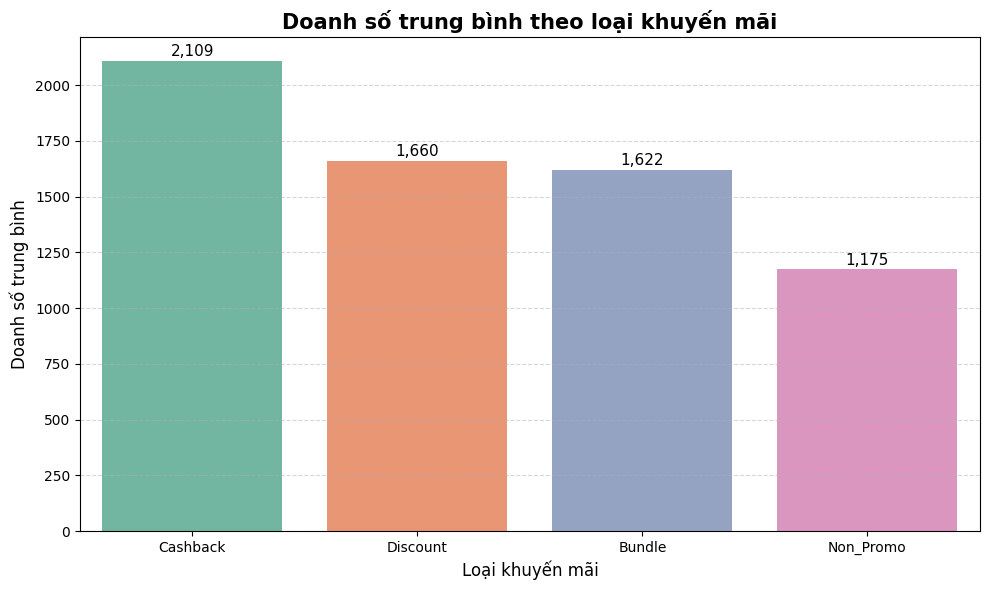

In [84]:

# T√≠nh doanh s·ªë trung b√¨nh theo lo·∫°i khuy·∫øn m√£i
promo_comparison = merged_df.groupby('Promo_Type')['New_Sales'].mean().sort_values(ascending=False).round(2)

# Thi·∫øt l·∫≠p figure v√† style
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x=promo_comparison.index,
    y=promo_comparison.values,
    palette='Set2'
)

# Th√™m s·ªë tr√™n ƒë·∫ßu c·ªôt
for i, v in enumerate(promo_comparison.values):
    plt.text(i, v + promo_comparison.max() * 0.01, f"{v:,.0f}", ha='center', fontsize=11)

# Trang tr√≠
plt.title('Doanh s·ªë trung b√¨nh theo lo·∫°i khuy·∫øn m√£i', fontsize=15, fontweight='bold')
plt.xlabel('Lo·∫°i khuy·∫øn m√£i', fontsize=12)
plt.ylabel('Doanh s·ªë trung b√¨nh', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [85]:
# Chia d·ªØ li·ªáu th√†nh 2 nh√≥m: c√≥ v√† kh√¥ng c√≥ khuy·∫øn m√£i
promo_sales = df[df['Promo_Type'] != 'Non_Promo']['New_Sales']
no_promo_sales = df[df['Promo_Type'] == 'Non_Promo']['New_Sales']

# Th·ª±c hi·ªán T-test
t_stat, p_val = ttest_ind(promo_sales, no_promo_sales, equal_var=False)  # Welch‚Äôs t-test

# In k·∫øt qu·∫£
print(" K·∫øt qu·∫£ T-test gi·ªØa th√°ng c√≥ khuy·∫øn m√£i v√† kh√¥ng c√≥ khuy·∫øn m√£i:")
print(f"‚Üí Mean (C√≥ khuy·∫øn m√£i): {promo_sales.mean():.2f}")
print(f"‚Üí Mean (Kh√¥ng c√≥ khuy·∫øn m√£i): {no_promo_sales.mean():.2f}")
print(f"‚Üí T-statistic: {t_stat:.2f}")
print(f"‚Üí P-value: {p_val:.4f}")

# Di·ªÖn gi·∫£i
if p_val < 0.05:
    print("\nC√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™: Khuy·∫øn m√£i ·∫£nh h∆∞·ªüng ƒë·∫øn doanh s·ªë.")
else:
    print("\nKh√¥ng c√≥ b·∫±ng ch·ª©ng th·ªëng k√™ r√µ r√†ng cho th·∫•y khuy·∫øn m√£i l√†m thay ƒë·ªïi doanh s·ªë.")



 K·∫øt qu·∫£ T-test gi·ªØa th√°ng c√≥ khuy·∫øn m√£i v√† kh√¥ng c√≥ khuy·∫øn m√£i:
‚Üí Mean (C√≥ khuy·∫øn m√£i): 1665.13
‚Üí Mean (Kh√¥ng c√≥ khuy·∫øn m√£i): 1174.76
‚Üí T-statistic: 6.39
‚Üí P-value: 0.0000

C√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™: Khuy·∫øn m√£i ·∫£nh h∆∞·ªüng ƒë·∫øn doanh s·ªë.


In [86]:
print(merged_df.columns)


Index(['New_Sales', 'Year', 'Month', 'YearMonth', 'Promo_ID', 'Active_Month',
       'Promo_Type', 'Budget_USD', 'Year_Group', 'Year_Group_Label'],
      dtype='object')


In [88]:

# T·∫°o c·ªôt Has_Promo n·∫øu ch∆∞a c√≥
merged_df['Has_Promo'] = merged_df['Promo_Type'].apply(lambda x: 0 if x == 'Non_Promo' else 1)


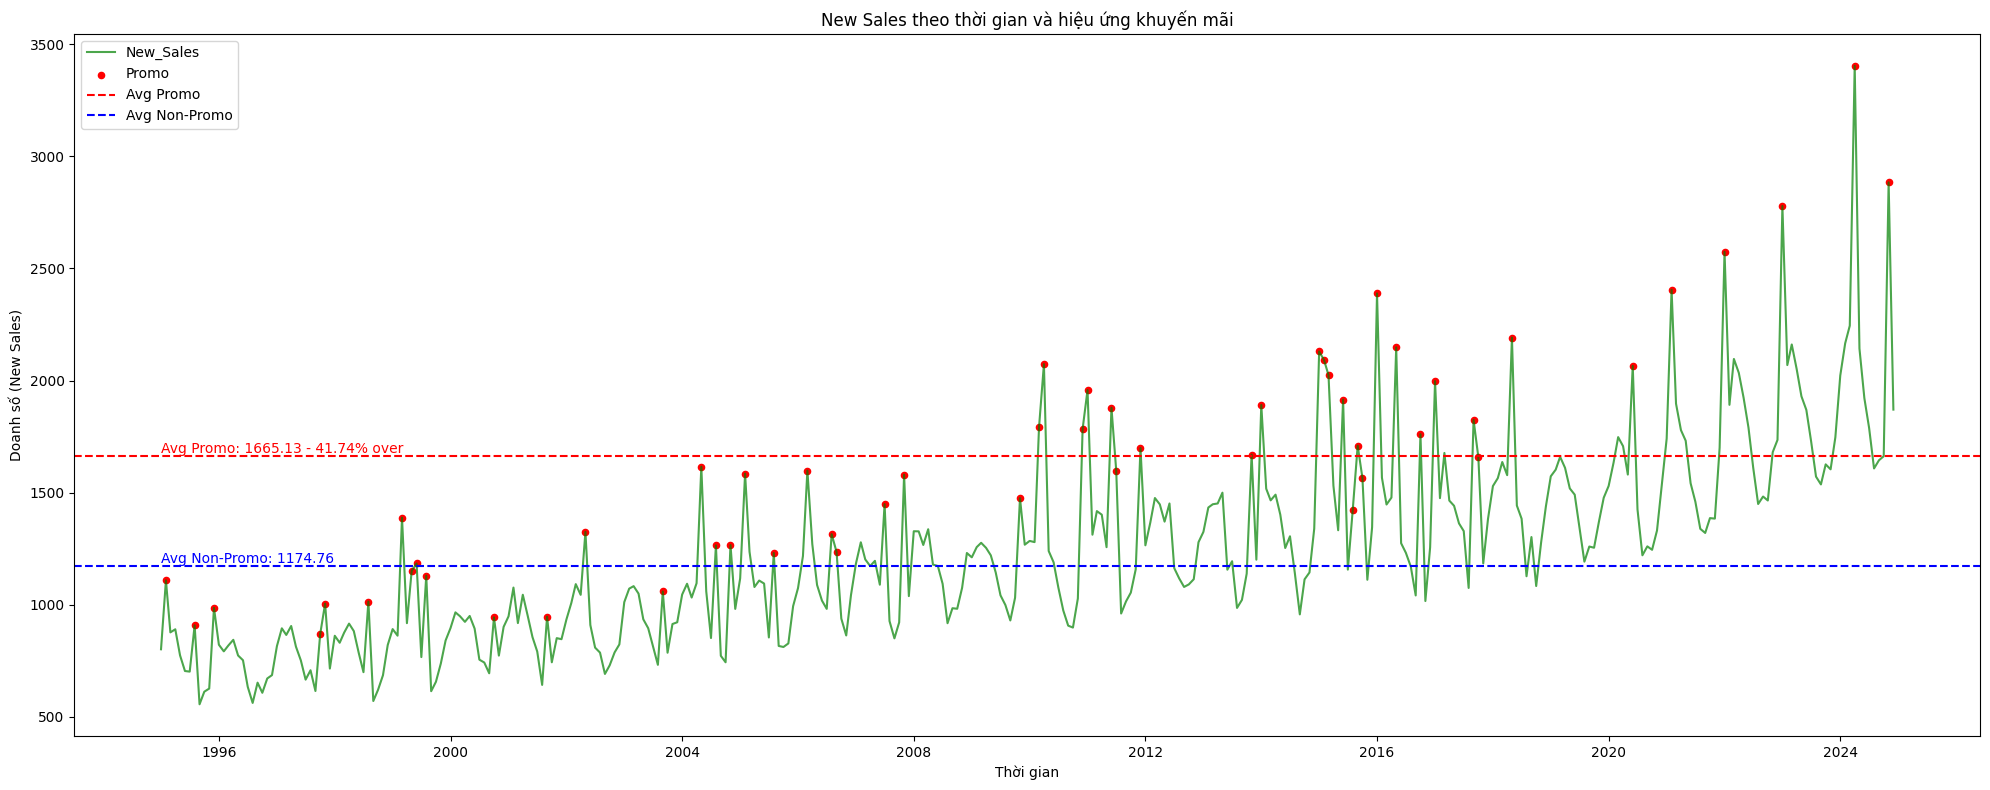

In [89]:
merged_df["Date_ts"] = pd.to_datetime(merged_df["Year"].astype(str) + "-" + merged_df["Month"].astype(str) + "-01")
# T·∫°o c·ªôt th·ªùi gian (n·∫øu ch∆∞a c√≥)
merged_df["Date_ts"] = pd.to_datetime(merged_df["Year"].astype(str) + "-" + merged_df["Month"].astype(str) + "-01")


fig, ax = plt.subplots(figsize=(20,8))

sns.lineplot(data=merged_df, x="Date_ts", y="New_Sales", ax=ax, color="green", alpha=0.7, label="New_Sales")

# T√°ch ra c√°c ƒëi·ªÉm c√≥ promo v√† kh√¥ng
promo = merged_df[merged_df["Has_Promo"] == 1]
nonpromo = merged_df[merged_df["Has_Promo"] == 0]


ax.scatter(
    promo["Date_ts"],
    promo["New_Sales"],
    s=20,
    color="red",
    marker="o",
    label="Promo"
)

# ƒê∆∞·ªùng trung b√¨nh
avg_sales_promo = promo["New_Sales"].mean()
avg_sales_nonpromo = nonpromo["New_Sales"].mean()

# V·∫Ω ƒë∆∞·ªùng trung b√¨nh
x_start = merged_df["Date_ts"].min()
ax.axhline(avg_sales_promo, color="red", linestyle="--", label="Avg Promo")
ax.axhline(avg_sales_nonpromo, color="blue", linestyle="--", label="Avg Non-Promo")

ax.text(x_start, avg_sales_promo, 
        f"Avg Promo: {avg_sales_promo:.2f} - {(avg_sales_promo/avg_sales_nonpromo - 1)*100:.2f}% over", 
        ha="left", va="bottom", color="red")

ax.text(x_start, avg_sales_nonpromo, 
        f"Avg Non-Promo: {avg_sales_nonpromo:.2f}", 
        ha="left", va="bottom", color="blue")


ax.legend()
plt.title("New Sales theo th·ªùi gian v√† hi·ªáu ·ª©ng khuy·∫øn m√£i")
plt.xlabel("Th·ªùi gian")
plt.ylabel("Doanh s·ªë (New Sales)")
plt.tight_layout()
plt.show()


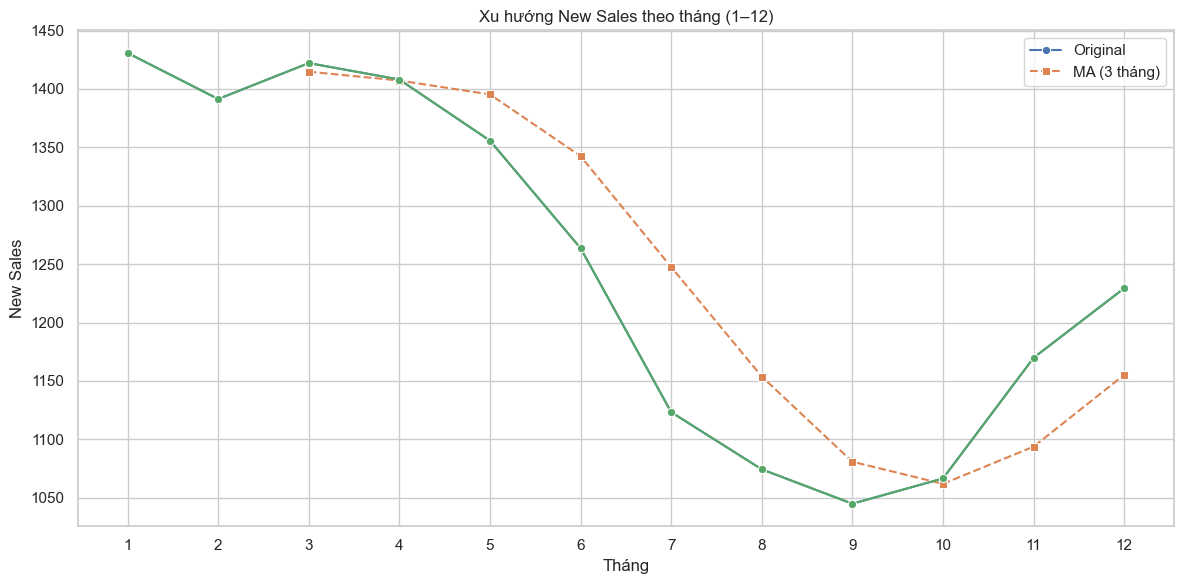

In [ ]:
# T√≠nh doanh s·ªë trung b√¨nh v√† chuy·ªÉn th√†nh DataFrame
monthly_avg = merged_df.groupby('Month')['New_Sales'].mean().reset_index()

# ƒê·ªïi t√™n c·ªôt cho d·ªÖ d√πng (kh√¥ng b·∫Øt bu·ªôc nh∆∞ng n√™n l√†m)
monthly_avg.columns = ['Th√°ng', 'New_Sales']
# T√≠nh Moving Average 3 th√°ng
monthly_avg['MA_3'] = monthly_avg['New_Sales'].rolling(window=3).mean()

# V·∫Ω line chart v·ªõi MA
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Th√°ng', y='New_Sales', label='Original', marker='o')
sns.lineplot(data=monthly_avg, x='Th√°ng', y='MA_3', label='MA (3 th√°ng)', marker='s', linestyle='--')

# V·∫Ω line chart v·ªõi seaborn
plt.title('Xu h∆∞·ªõng New Sales theo th√°ng (1‚Äì12)')
plt.xlabel('Th√°ng')
plt.ylabel('New Sales')
plt.xticks(ticks=range(1, 13), labels=[str(m) for m in range(1, 13)])
plt.grid(True)
plt.legend()
plt.tight_layout()
sns.lineplot(data=monthly_avg, x='Th√°ng', y='New_Sales', marker='o')
plt.show()


In [ ]:

# B∆∞·ªõc 1: G√°n m√πa
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
merged_df['Season'] = merged_df['Month'].map(season_mapping)

# B∆∞·ªõc 2: T√≠nh t·ªïng doanh s·ªë theo m√πa
seasonal_sales = merged_df.groupby('Season')['New_Sales'].mean().reset_index()
seasonal_sales


Season    New_Sales
0    Fall  1093.679638
1  Spring  1395.335000
2  Summer  1153.710451
3  Winter  1350.527950

In [ ]:
seasonal_sales = merged_df.groupby('Season')['Budget_USD'].mean().reset_index()
seasonal_sales

Season   Budget_USD
0    Fall  2511.111111
1  Spring  1744.444444
2  Summer  2300.000000
3  Winter  2122.222222

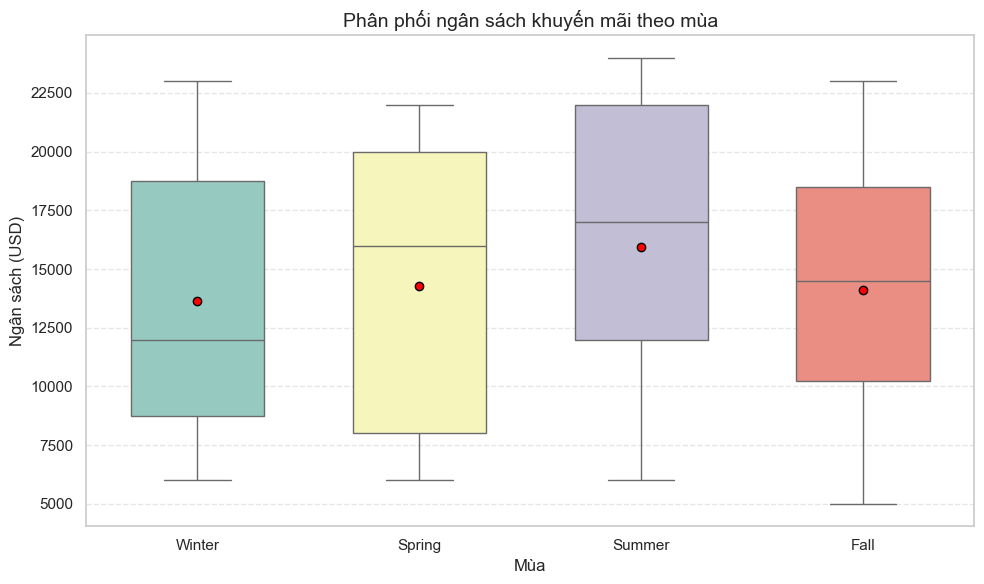

In [ ]:
promo_df = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
promo_df['Season'] = pd.Categorical(promo_df['Season'], categories=season_order, ordered=True)

# T·∫°o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=promo_df,
    x='Season',
    y='Budget_USD',
    palette='Set3',
    width=0.6,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)

# Trang tr√≠
plt.title('Ph√¢n ph·ªëi ng√¢n s√°ch khuy·∫øn m√£i theo m√πa', fontsize=14)
plt.xlabel('M√πa')
plt.ylabel('Ng√¢n s√°ch (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

1. M√πa h√® (Summer):
C√≥ median (trung v·ªã) ng√¢n s√°ch cao nh·∫•t trong c√°c m√πa.

Kho·∫£ng ph√¢n v·ªã (IQR) r·ªông, cho th·∫•y s·ª± dao ƒë·ªông l·ªõn trong m·ª©c chi ng√¢n s√°ch.

C√≥ nhi·ªÅu ng√¢n s√°ch v∆∞·ª£t tr·ªôi (quai whisker ph√≠a tr√™n d√†i).

Mean (d·∫•u ch·∫•m ƒë·ªè) c≈©ng cao h∆°n median, cho th·∫•y c√≥ th·ªÉ c√≥ m·ªôt v√†i ƒëi·ªÉm ng√¢n s√°ch r·∫•t cao k√©o trung b√¨nh l√™n ‚Üí ph√¢n ph·ªëi b·ªã l·ªách ph·∫£i (right-skewed).

2. M√πa xu√¢n (Spring):
M·ª©c median cao th·ª© 2, kh√° g·∫ßn v·ªõi Summer.

Ph√¢n ph·ªëi kh√° ·ªïn ƒë·ªãnh, IQR kh√¥ng qu√° r·ªông.

Mean h∆°i cao h∆°n median, c√≥ th·ªÉ v·∫´n c√≥ m·ªôt v√†i ng√¢n s√°ch cao nh∆∞ng kh√¥ng c·ª±c ƒëoan.

3. M√πa thu (Fall):
Median v√† mean g·∫ßn nhau, ph√¢n ph·ªëi c√¢n b·∫±ng.

Nh∆∞ng IQR l·ªõn, nghƒ©a l√† c√≥ c√°c chi·∫øn d·ªãch khuy·∫øn m√£i r·∫•t kh√°c nhau v·ªÅ ng√¢n s√°ch trong c√πng m√πa n√†y.

C√≥ m·ªôt v√†i ƒëi·ªÉm th·∫•p r√µ r·ªát ‚Üí c√≥ kh·∫£ nƒÉng xu·∫•t hi·ªán promo ng√¢n s√°ch th·∫•p v√†o cu·ªëi nƒÉm.

4. M√πa ƒë√¥ng (Winter):
Median th·∫•p nh·∫•t trong c·∫£ 4 m√πa.

Tuy nhi√™n, whiskers k√©o d√†i cho th·∫•y v·∫´n c√≥ nh·ªØng th√°ng ng√¢n s√°ch cao ‚Üí s·ª± ph√¢n t√°n cao.

Mean l·ªõn h∆°n median, c≈©ng g·ª£i √Ω v·ªÅ ph√¢n ph·ªëi l·ªách ph·∫£i, nh∆∞ng kh√¥ng nhi·ªÅu b·∫±ng Summer.

T·ªïng k·∫øt Insight:
Summer l√† m√πa ƒë∆∞·ª£c ƒë·∫ßu t∆∞ ng√¢n s√°ch promo cao nh·∫•t, nh∆∞ng c≈©ng dao ƒë·ªông m·∫°nh nh·∫•t 

Winter tuy c√≥ m·ªôt s·ªë chi·∫øn d·ªãch ng√¢n s√°ch cao nh∆∞ng ƒëa ph·∫ßn l√† ng√¢n s√°ch th·∫•p 

Spring v√† Fall c√≥ ph√¢n ph·ªëi ng√¢n s√°ch kh√° c√¢n b·∫±ng, ph√π h·ª£p v·ªõi c√°c chi·∫øn d·ªãch th∆∞·ªùng k·ª≥ ho·∫∑c d·ªãp chuy·ªÉn m√πa.

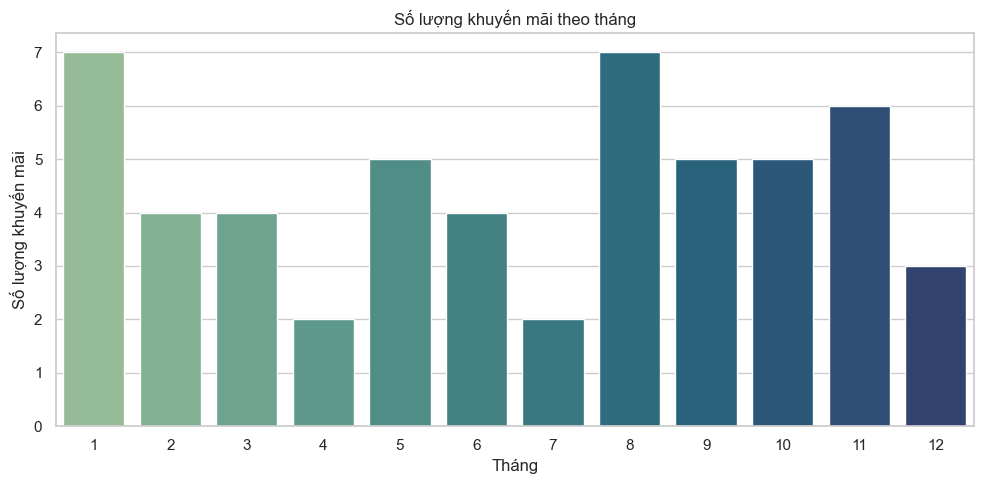

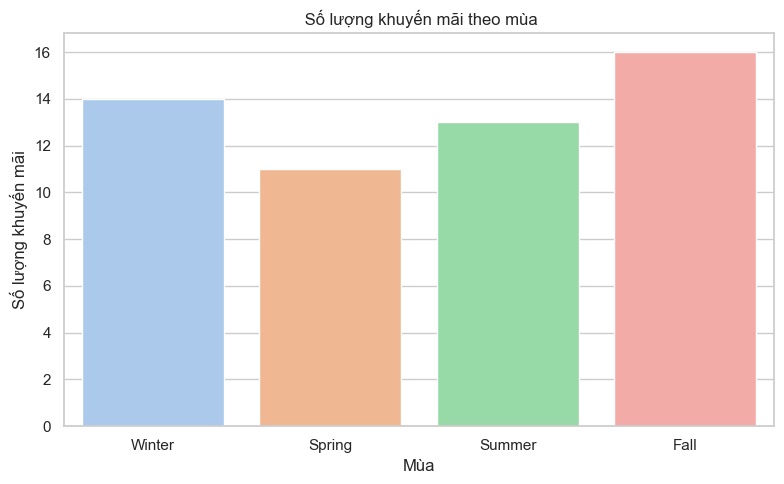

In [ ]:

# Ch·ªâ l·∫•y c√°c d√≤ng c√≥ khuy·∫øn m√£i
promo_only = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()

# T·∫°o c·ªôt Season n·∫øu ch∆∞a c√≥
if 'Season' not in promo_only.columns:
    season_mapping = {
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    }
    promo_only['Season'] = promo_only['Month'].map(season_mapping)

# Thi·∫øt l·∫≠p ki·ªÉu v·∫Ω ƒë·∫πp
sns.set(style="whitegrid")

# ======= 1. Count khuy·∫øn m√£i theo th√°ng =======
plt.figure(figsize=(10, 5))
sns.countplot(data=promo_only, x='Month', palette='crest')
plt.title('S·ªë l∆∞·ª£ng khuy·∫øn m√£i theo th√°ng')
plt.xlabel('Th√°ng')
plt.ylabel('S·ªë l∆∞·ª£ng khuy·∫øn m√£i')
plt.tight_layout()
plt.show()

# ======= 2. Count khuy·∫øn m√£i theo m√πa =======
plt.figure(figsize=(8, 5))
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
sns.countplot(data=promo_only, x='Season', order=season_order, palette='pastel')
plt.title(' S·ªë l∆∞·ª£ng khuy·∫øn m√£i theo m√πa')
plt.xlabel('M√πa')
plt.ylabel('S·ªë l∆∞·ª£ng khuy·∫øn m√£i')
plt.tight_layout()
plt.show()


Th√°ng 1 & 8 c√≥ nhi·ªÅu khuy·∫øn m√£i nh·∫•t, Th√°ng 4 & 7 r·∫•t √≠t 

Fall l√† m√πa c√≥ nhi·ªÅu ho·∫°t ƒë·ªông nh·∫•t ‚Üí c√≥ th·ªÉ l√† m√πa cao ƒëi·ªÉm b√°n h√†ng ho·∫∑c x·∫£ h√†ng.

Spring √≠t khuy·∫øn m√£i nh·∫•t

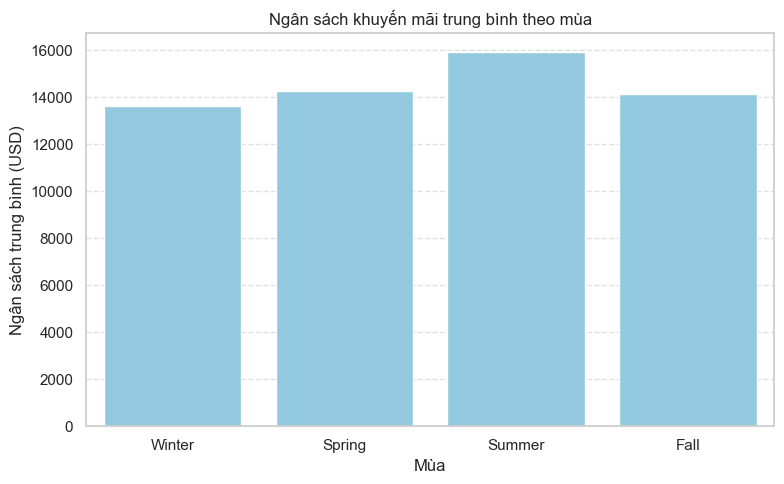

In [ ]:
# T√≠nh ng√¢n s√°ch trung b√¨nh theo m√πa
seasonal_budget = promo_only.groupby('Season')['Budget_USD'].mean().reset_index()

# ƒê·∫£m b·∫£o ƒë√∫ng th·ª© t·ª± m√πa
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_budget['Season'] = pd.Categorical(seasonal_budget['Season'], categories=season_order, ordered=True)
seasonal_budget = seasonal_budget.sort_values('Season')

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_budget, x='Season', y='Budget_USD', color='skyblue')
plt.title('Ng√¢n s√°ch khuy·∫øn m√£i trung b√¨nh theo m√πa')
plt.xlabel('M√πa')
plt.ylabel('Ng√¢n s√°ch trung b√¨nh (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

| M√πa                  | S·ªë l∆∞·ª£ng khuy·∫øn m√£i   | Ng√¢n s√°ch trung b√¨nh/l·∫ßn | ƒê·ªô ·ªïn ƒë·ªãnh ng√¢n s√°ch     |
| -------------------- | --------------------- | ------------------------ | ------------------------ |
| **Winter (Dec‚ÄìFeb)** | Cao (14 l·∫ßn)          | Th·∫•p nh·∫•t (\~13.5K USD)  | Dao ƒë·ªông r·ªông            |
| **Spring (Mar‚ÄìMay)** | Th·∫•p nh·∫•t (11 l·∫ßn)    | V·ª´a (\~14.2K)            | Ph√¢n ph·ªëi kh√¥ng qu√° r·ªông |
| **Summer (Jun‚ÄìAug)** | Trung b√¨nh (13 l·∫ßn)   | **Cao nh·∫•t (\~16K USD)** | Dao ƒë·ªông m·∫°nh            |
| **Fall (Sep‚ÄìNov)**   | **Cao nh·∫•t (16 l·∫ßn)** | V·ª´a (\~14K)              | ·ªîn ƒë·ªãnh h∆°n              |


**Di·ªÖn gi·∫£i c√≥ t√≠nh m√πa v·ª• (d·ª±a tr√™n th·ªùi ti·∫øt v√† th√≥i quen mua s·∫Øm c·ªßa ng∆∞·ªùi M·ªπ)**

‚ùÑÔ∏è Winter ‚Äì M√πa ƒëang m·∫∑c sweater
Khuy·∫øn m√£i v·∫´n ƒë∆∞·ª£c ƒë·∫©y m·∫°nh (14 l·∫ßn), nh∆∞ng m·ª©c ng√¢n s√°ch trung b√¨nh l·∫°i th·∫•p ‚Üí c√≥ th·ªÉ l√† c√°c ƒë·ª£t x·∫£ kho sau Gi√°ng sinh ho·∫∑c k√©o d√†i s·ª©c mua d·ªãp sale cu·ªëi nƒÉm.

Dao ƒë·ªông m·∫°nh v·ªÅ ng√¢n s√°ch ‚Üí cho th·∫•y chi·∫øn d·ªãch ‚Äúx·∫£ h√†ng‚Äù ho·∫∑c "test th·ªã tr∆∞·ªùng" linh ho·∫°t.

üå± Spring ‚Äì Sweater tho√°t kh·ªèi m√πa cao ƒëi·ªÉm
S·ªë l∆∞·ª£ng √≠t nh·∫•t, h·ª£p l√Ω v√¨ m√πa xu√¢n kh√°ch h√†ng ƒë√£ gi·∫£m nhu c·∫ßu v·ªõi √°o ·∫•m.

Doanh nghi·ªáp ch·ªâ c√≤n ch·∫°y c√°c promo nh·∫π, ch·ªß y·∫øu x·ª≠ l√Ω t·ªìn kho.

‚òÄÔ∏è Summer ‚Äì M√πa kh√¥ng ph√π h·ª£p, nh∆∞ng ng√¢n s√°ch cao
D√π kh√¥ng ph·∫£i m√πa m·∫∑c sweater, nh∆∞ng ng√¢n s√°ch m·ªói ƒë·ª£t khuy·∫øn m√£i l·∫°i cao nh·∫•t.

C√≥ th·ªÉ l√† chi·∫øn l∆∞·ª£c off-season clearance m·∫°nh tay (gi·∫£m s√¢u) ho·∫∑c build awareness s·ªõm cho m√πa thu (Back-to-school, early fall collection).

üçÇ Fall ‚Äì M√πa ‚Äúb·∫Øt ƒë·∫ßu‚Äù b√°n sweater
S·ªë l∆∞·ª£ng khuy·∫øn m√£i cao nh·∫•t (16) cho th·∫•y ƒë√¢y l√† m√πa chi·∫øn l∆∞·ª£c ra m·∫Øt b·ªô s∆∞u t·∫≠p m·ªõi.

M·ª©c chi trung b√¨nh kh√¥ng cao nh·∫•t, nh∆∞ng ·ªïn ƒë·ªãnh v√† ƒë·ªÅu ‚Üí c√≥ th·ªÉ l√† lo·∫°t chi·∫øn d·ªãch k√©o d√†i, chu·∫©n b·ªã tr∆∞·ªõc m√πa ƒë√¥ng.

| Giai ƒëo·∫°n            | Chi·∫øn l∆∞·ª£c ƒë·ªÅ xu·∫•t                                                                                                                   |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| **Fall (Sep‚ÄìNov)**   | T·∫≠p trung nhi·ªÅu khuy·∫øn m√£i v·ª´a ph·∫£i ƒë·ªÉ **k√≠ch c·∫ßu s·ªõm**, ƒë·∫©y h√†ng v√†o ƒë·∫ßu m√πa l·∫°nh.                                                  |
| **Winter (Dec‚ÄìFeb)** | Duy tr√¨ m·ªôt s·ªë khuy·∫øn m√£i **m·ª©c nh·∫π ho·∫∑c x·∫£ kho** sau l·ªÖ, tr√°nh l√£ng ph√≠ ng√¢n s√°ch.                                                  |
| **Spring (Mar‚ÄìMay)** | **Gi·∫£m b·ªõt khuy·∫øn m√£i**, ch·ªâ n√™n x·ª≠ l√Ω h√†ng t·ªìn. C√≥ th·ªÉ th·ª≠ b√°n ch√©o v·ªõi s·∫£n ph·∫©m xu√¢n h√®.                                           |
| **Summer (Jun‚ÄìAug)** | N·∫øu ti·∫øp t·ª•c khuy·∫øn m√£i, n√™n t·∫≠p trung v√†o **chi·∫øn d·ªãch off-season clearance l·ªõn**, ho·∫∑c build anticipation cho fall collection m·ªõi. |


Chi·∫øn d·ªãch khuy·∫øn m√£i sweater n√™n t·∫≠p trung d·ªìn l·ª±c v√†o Fall ƒë·ªÉ chu·∫©n b·ªã th·ªã tr∆∞·ªùng, nh·∫π tay v√†o Winter ƒë·ªÉ t·ªëi ∆∞u bi√™n l·ª£i nhu·∫≠n, v√† d√πng Summer l√†m th·ªùi ƒëi·ªÉm x·∫£ h√†ng ho·∫∑c qu·∫£ng b√° th∆∞∆°ng hi·ªáu.

Spring b√°n sweater t·ªët nh·∫•t, d√π c√≥ √≠t khuy·∫øn m√£i nh·∫•t ‚Üí C√≥ th·ªÉ t·∫≠n d·ª•ng cho chi·∫øn d·ªãch outlet/clearance ƒë·∫ßu xu√¢n ho·∫∑c b√°n ch√©o v·ªõi s·∫£n ph·∫©m trung t√≠nh (sweater nh·∫π, cardigan).

Winter v·∫´n duy tr√¨ t·ªët, kh√¥ng b·∫•t ng·ªù ‚Üí Nh∆∞ng n√™n ∆∞u ti√™n bi√™n l·ª£i nhu·∫≠n h∆°n khuy·∫øn m√£i.

Summer surprisingly kh√° ·ªïn, n√™n t·∫≠n d·ª•ng b√°n off-season k·∫øt h·ª£p qu·∫£ng b√°.

Fall kh√¥ng hi·ªáu qu·∫£ v·ªÅ doanh s·ªë sweater d√π nhi·ªÅu khuy·∫øn m√£i:

C·∫ßn ƒë√°nh gi√° l·∫°i content/targeting c·ªßa promo Fall: c√≥ th·ª±c s·ª± push sweater hay kh√¥ng?

Ho·∫∑c chuy·ªÉn h∆∞·ªõng sang build brand/awareness thay v√¨ k·ª≥ v·ªçng doanh s·ªë.

## **Multi**

In [ ]:

# B∆∞·ªõc 1: Lo·∫°i b·ªè c√°c d√≤ng kh√¥ng c√≥ khuy·∫øn m√£i
promo_only = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()
# B∆∞·ªõc 2: T·ªïng h·ª£p theo m√πa v√† lo·∫°i khuy·∫øn m√£i
summary = promo_only.groupby(['Season', 'Promo_Type']).agg({
    'New_Sales': 'sum',
    'Budget_USD': 'sum',
    'Promo_ID': 'count'  # d√πng Promo_ID ƒë·ªÉ ƒë·∫øm s·ªë chi·∫øn d·ªãch
}).rename(columns={
    'New_Sales': 'Total_Sales',
    'Budget_USD': 'Total_Budget',
    'Promo_ID': 'Campaign_Count'
}).reset_index()
# B∆∞·ªõc 4: S·∫Øp x·∫øp th·ª© t·ª± m√πa
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
summary['Season'] = pd.Categorical(summary['Season'], categories=season_order, ordered=True)
summary = summary.sort_values(['Season', 'Promo_Type'])

# B∆∞·ªõc 5: Hi·ªÉn th·ªã b·∫£ng ƒë·∫πp
print("T·ªïng h·ª£p theo M√πa v√† Lo·∫°i Khuy·∫øn M√£i:\n")
print(tabulate(
    summary,
    headers='keys',
    tablefmt='fancy_grid',
    showindex=False,
    floatfmt=(".0f", ".0f", ".0f", ".0f", ".1f")
))


T·ªïng h·ª£p theo M√πa v√† Lo·∫°i Khuy·∫øn M√£i:

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ Season   ‚îÇ Promo_Type   ‚îÇ   Total_Sales ‚îÇ   Total_Budget ‚îÇ   Campaign_Count ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Winter   ‚îÇ Bundle       ‚îÇ         18131 ‚îÇ         126000 ‚îÇ                9 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Winter   ‚îÇ Discount     ‚îÇ          9246 ‚îÇ 

In [ ]:
# T·∫°o Season n·∫øu ch∆∞a c√≥
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

merged_df['Season'] = merged_df['Month'].apply(assign_season)

import pandas as pd

# L·ªçc c√°c d√≤ng c√≥ khuy·∫øn m√£i (lo·∫°i tr·ª´ 'Non_Promo')
promo_df = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()

# ƒê·∫£m b·∫£o th·ª© t·ª± c√°c m√πa
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
promo_df['Season'] = pd.Categorical(promo_df['Season'], categories=season_order, ordered=True)

# T√≠nh ng√¢n s√°ch trung b√¨nh theo m√πa v√† lo·∫°i khuy·∫øn m√£i
avg_budget_by_season_type = (
    promo_df.groupby(['Season', 'Promo_Type'])['Budget_USD']
    .mean()
    .reset_index()
    .sort_values(by=['Season', 'Promo_Type'])
)

# In k·∫øt qu·∫£
print(avg_budget_by_season_type)


    Season Promo_Type    Budget_USD
0   Winter     Bundle  14000.000000
1   Winter   Cashback           NaN
2   Winter   Discount  13000.000000
3   Spring     Bundle  15000.000000
4   Spring   Cashback  11000.000000
5   Spring   Discount  17000.000000
6   Summer     Bundle  18500.000000
7   Summer   Cashback           NaN
8   Summer   Discount  14777.777778
9     Fall     Bundle  14444.444444
10    Fall   Cashback           NaN
11    Fall   Discount  13714.285714


In [ ]:
# T√≠nh Pearson correlation
x = merged_df['Budget_USD']
y = merged_df['New_Sales']
corr, p_value = pearsonr(x, y)

print("Pearson Correlation between Budget and New Sales:")
print("r =", round(corr, 3))
print("p-value =", round(p_value, 4))


Pearson Correlation between Budget and New Sales:
r = 0.422
p-value = 0.0


Ng√¢n s√°ch khuy·∫øn m√£i c√≥ ·∫£nh h∆∞·ªüng ƒë·∫øn doanh s·ªë sweater ·ªü m·ª©c trung b√¨nh, ƒë√°ng tin c·∫≠y v·ªÅ m·∫∑t th·ªëng k√™

Pearson Correlation gi·ªØa Budget v√† Sales theo t·ª´ng lo·∫°i khuy·∫øn m√£i:
‚Üí Bundle: r = 0.16, p = 0.423
‚Üí Discount: r = 0.28, p = 0.190
‚Üí Cashback: r = 0.97, p = 0.168
Correlation CHUNG gi·ªØa Budget v√† Sales:
‚Üí Pearson r = 0.24, p-value = 0.0829


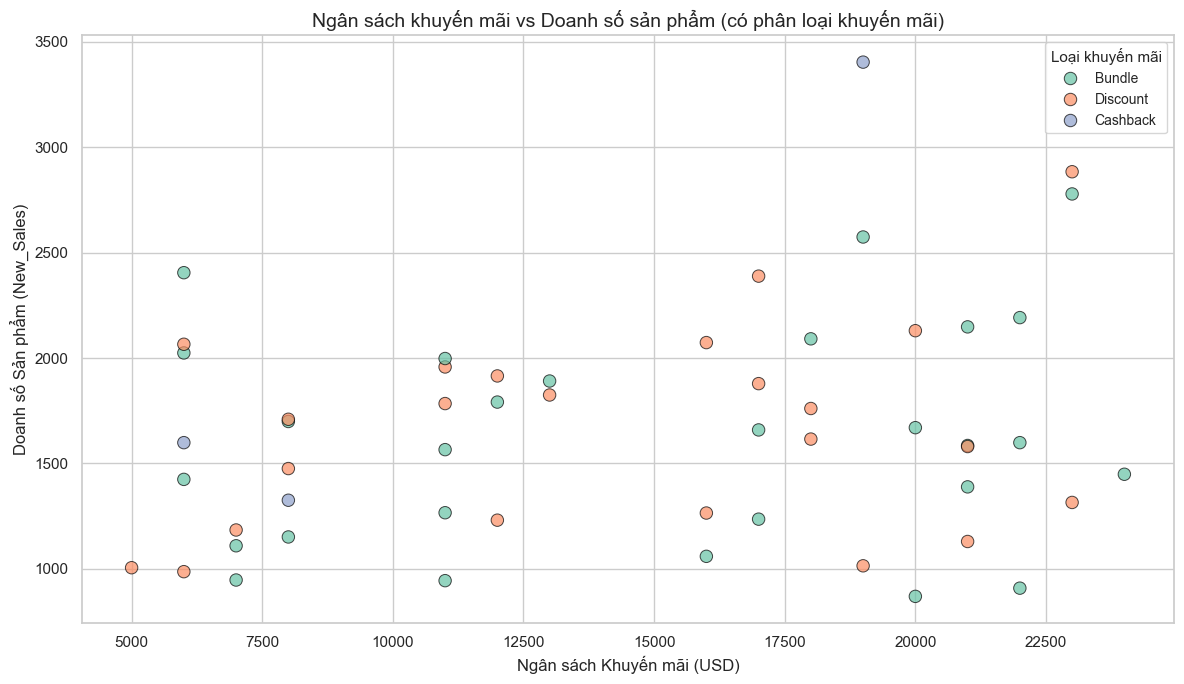

In [ ]:
# B∆∞·ªõc 1: L·ªçc ra c√°c d√≤ng c√≥ khuy·∫øn m√£i
promo_only = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()

# B∆∞·ªõc 2: Thi·∫øt l·∫≠p plot
plt.figure(figsize=(12, 7))
sns.set(style='whitegrid', palette='Set2')

# B∆∞·ªõc 3: V·∫Ω scatter plot
sns.scatterplot(
    data=promo_only,
    x='Budget_USD',
    y='New_Sales',
    hue='Promo_Type',
    alpha=0.7,
    edgecolor='black',
    s=80
)

# B∆∞·ªõc 4: Th√™m th√¥ng tin t∆∞∆°ng quan cho t·ª´ng lo·∫°i promo
print("Pearson Correlation gi·ªØa Budget v√† Sales theo t·ª´ng lo·∫°i khuy·∫øn m√£i:")
for promo in promo_only['Promo_Type'].unique():
    df_sub = promo_only[promo_only['Promo_Type'] == promo]
    if len(df_sub) >= 2:
        r, p = pearsonr(df_sub['Budget_USD'], df_sub['New_Sales'])
        print(f"‚Üí {promo}: r = {r:.2f}, p = {p:.3f}")
    else:
        print(f"‚Üí {promo}: Kh√¥ng ƒë·ªß d·ªØ li·ªáu")

# Lo·∫°i b·ªè NaN n·∫øu c√≥
df_corr = promo_only.dropna(subset=['Budget_USD', 'New_Sales'])

# T√≠nh Pearson Correlation
r_all, p_all = pearsonr(df_corr['Budget_USD'], df_corr['New_Sales'])

print(f"Correlation CHUNG gi·ªØa Budget v√† Sales:")
print(f"‚Üí Pearson r = {r_all:.2f}, p-value = {p_all:.4f}")

# B∆∞·ªõc 5: Giao di·ªán ƒë·ªì h·ªça
plt.title("Ng√¢n s√°ch khuy·∫øn m√£i vs Doanh s·ªë s·∫£n ph·∫©m (c√≥ ph√¢n lo·∫°i khuy·∫øn m√£i)", fontsize=14)
plt.xlabel("Ng√¢n s√°ch Khuy·∫øn m√£i (USD)", fontsize=12)
plt.ylabel("Doanh s·ªë S·∫£n ph·∫©m (New_Sales)", fontsize=12)
plt.legend(title="Lo·∫°i khuy·∫øn m√£i", title_fontsize=11, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


 Kh√¥ng c√≥ lo·∫°i khuy·∫øn m√£i n√†o cho th·∫•y m·ªëi t∆∞∆°ng quan r√µ r√†ng v√† ƒë√°ng tin c·∫≠y gi·ªØa ng√¢n s√°ch v√† doanh s·ªë sweater.


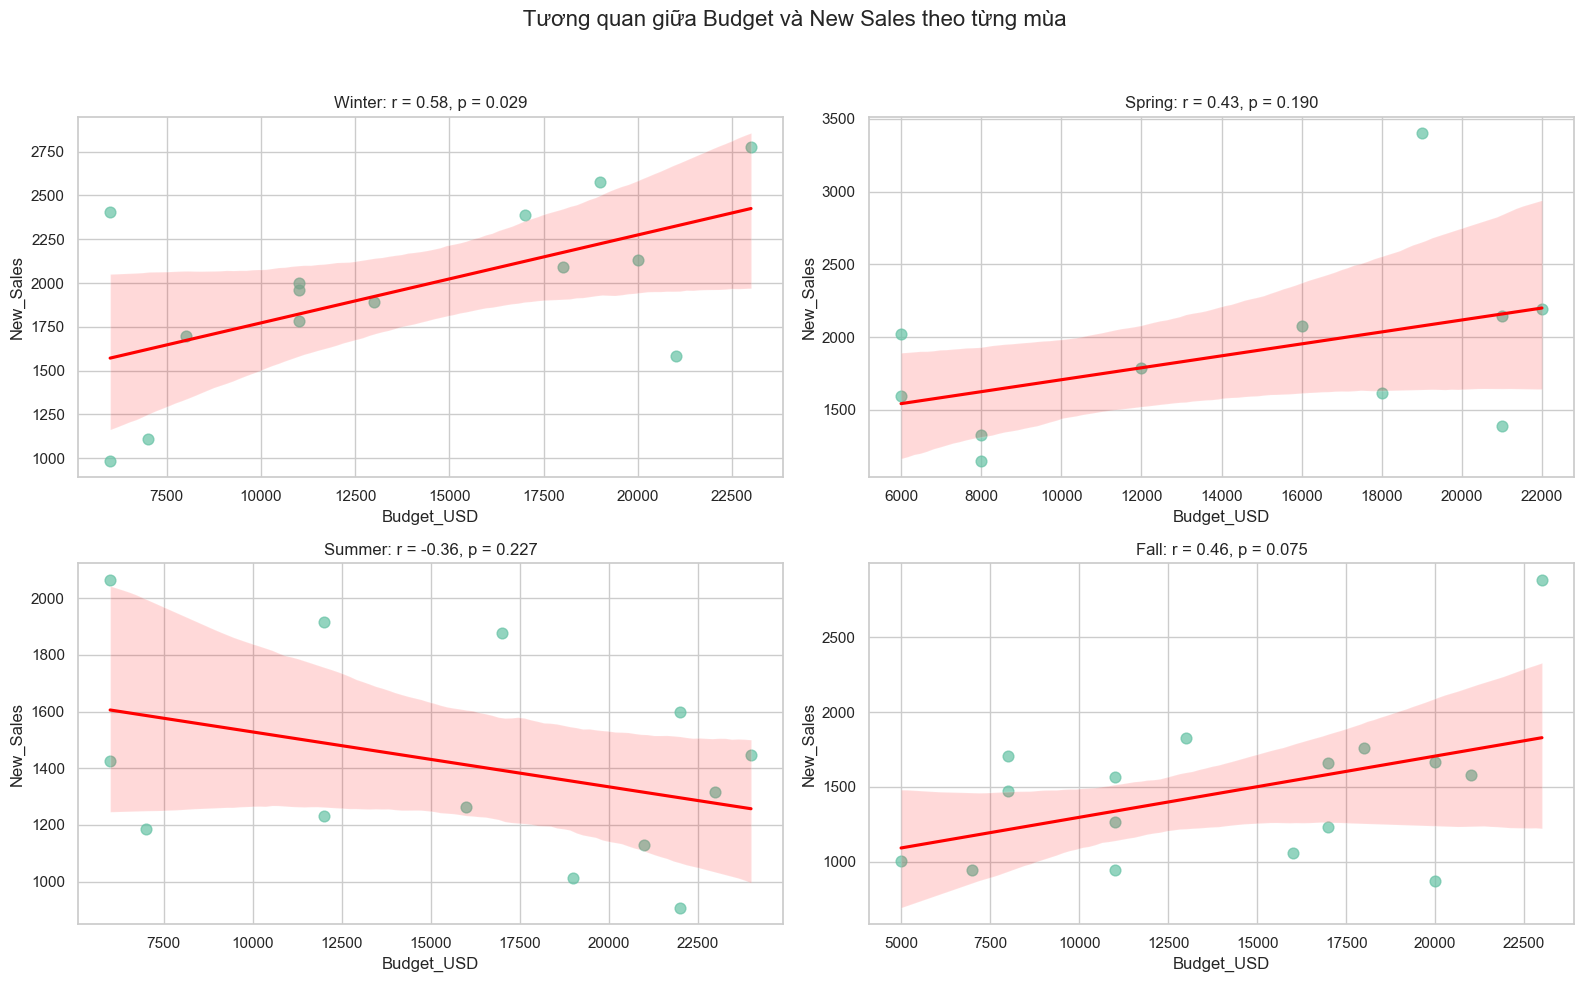

In [ ]:
# L·ªçc nh·ªØng th√°ng c√≥ khuy·∫øn m√£i
promo_only = merged_df[merged_df['Promo_Type'] != 'Non_Promo'].copy()
promo_only = promo_only.dropna(subset=['Budget_USD', 'New_Sales', 'Season'])

# L·∫•y danh s√°ch m√πa theo th·ª© t·ª±
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

# T·∫°o figure nhi·ªÅu bi·ªÉu ƒë·ªì
plt.figure(figsize=(16, 10))
for i, season in enumerate(seasons, 1):
    subset = promo_only[promo_only['Season'] == season]

    if len(subset) >= 2:  # c·∫ßn √≠t nh·∫•t 2 ƒëi·ªÉm ƒë·ªÉ t√≠nh t∆∞∆°ng quan
        r, p = pearsonr(subset['Budget_USD'], subset['New_Sales'])
        title = f"{season}: r = {r:.2f}, p = {p:.3f}"
    else:
        title = f"{season}: Kh√¥ng ƒë·ªß d·ªØ li·ªáu"

    plt.subplot(2, 2, i)
    sns.regplot(
        data=subset,
        x='Budget_USD',
        y='New_Sales',
        scatter_kws={'s': 60, 'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title(title)
    plt.xlabel('Budget_USD')
    plt.ylabel('New_Sales')
    plt.grid(True)

plt.suptitle(' T∆∞∆°ng quan gi·ªØa Budget v√† New Sales theo t·ª´ng m√πa', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Chi ti·ªÅn khuy·∫øn m√£i m√πa h√® c√≥ th·ªÉ ph·∫£n t√°c d·ª•ng, v√¨ nhu c·∫ßu sweater th·∫•p ‚Üí chi nhi·ªÅu kh√¥ng k√©o ƒë∆∞·ª£c doanh s·ªë

M√πa thu c√≥ th·ªÉ b·∫Øt ƒë·∫ßu c√≥ hi·ªáu qu·∫£ khi chi ng√¢n s√°ch, v√¨ ƒë√¢y l√† giai ƒëo·∫°n nhu c·∫ßu sweater b·∫Øt ƒë·∫ßu tƒÉng

Khi tƒÉng ng√¢n s√°ch khuy·∫øn m√£i v√†o m√πa ƒë√¥ng, doanh s·ªë sweater c√≥ xu h∆∞·ªõng tƒÉng r√µ r√†ng

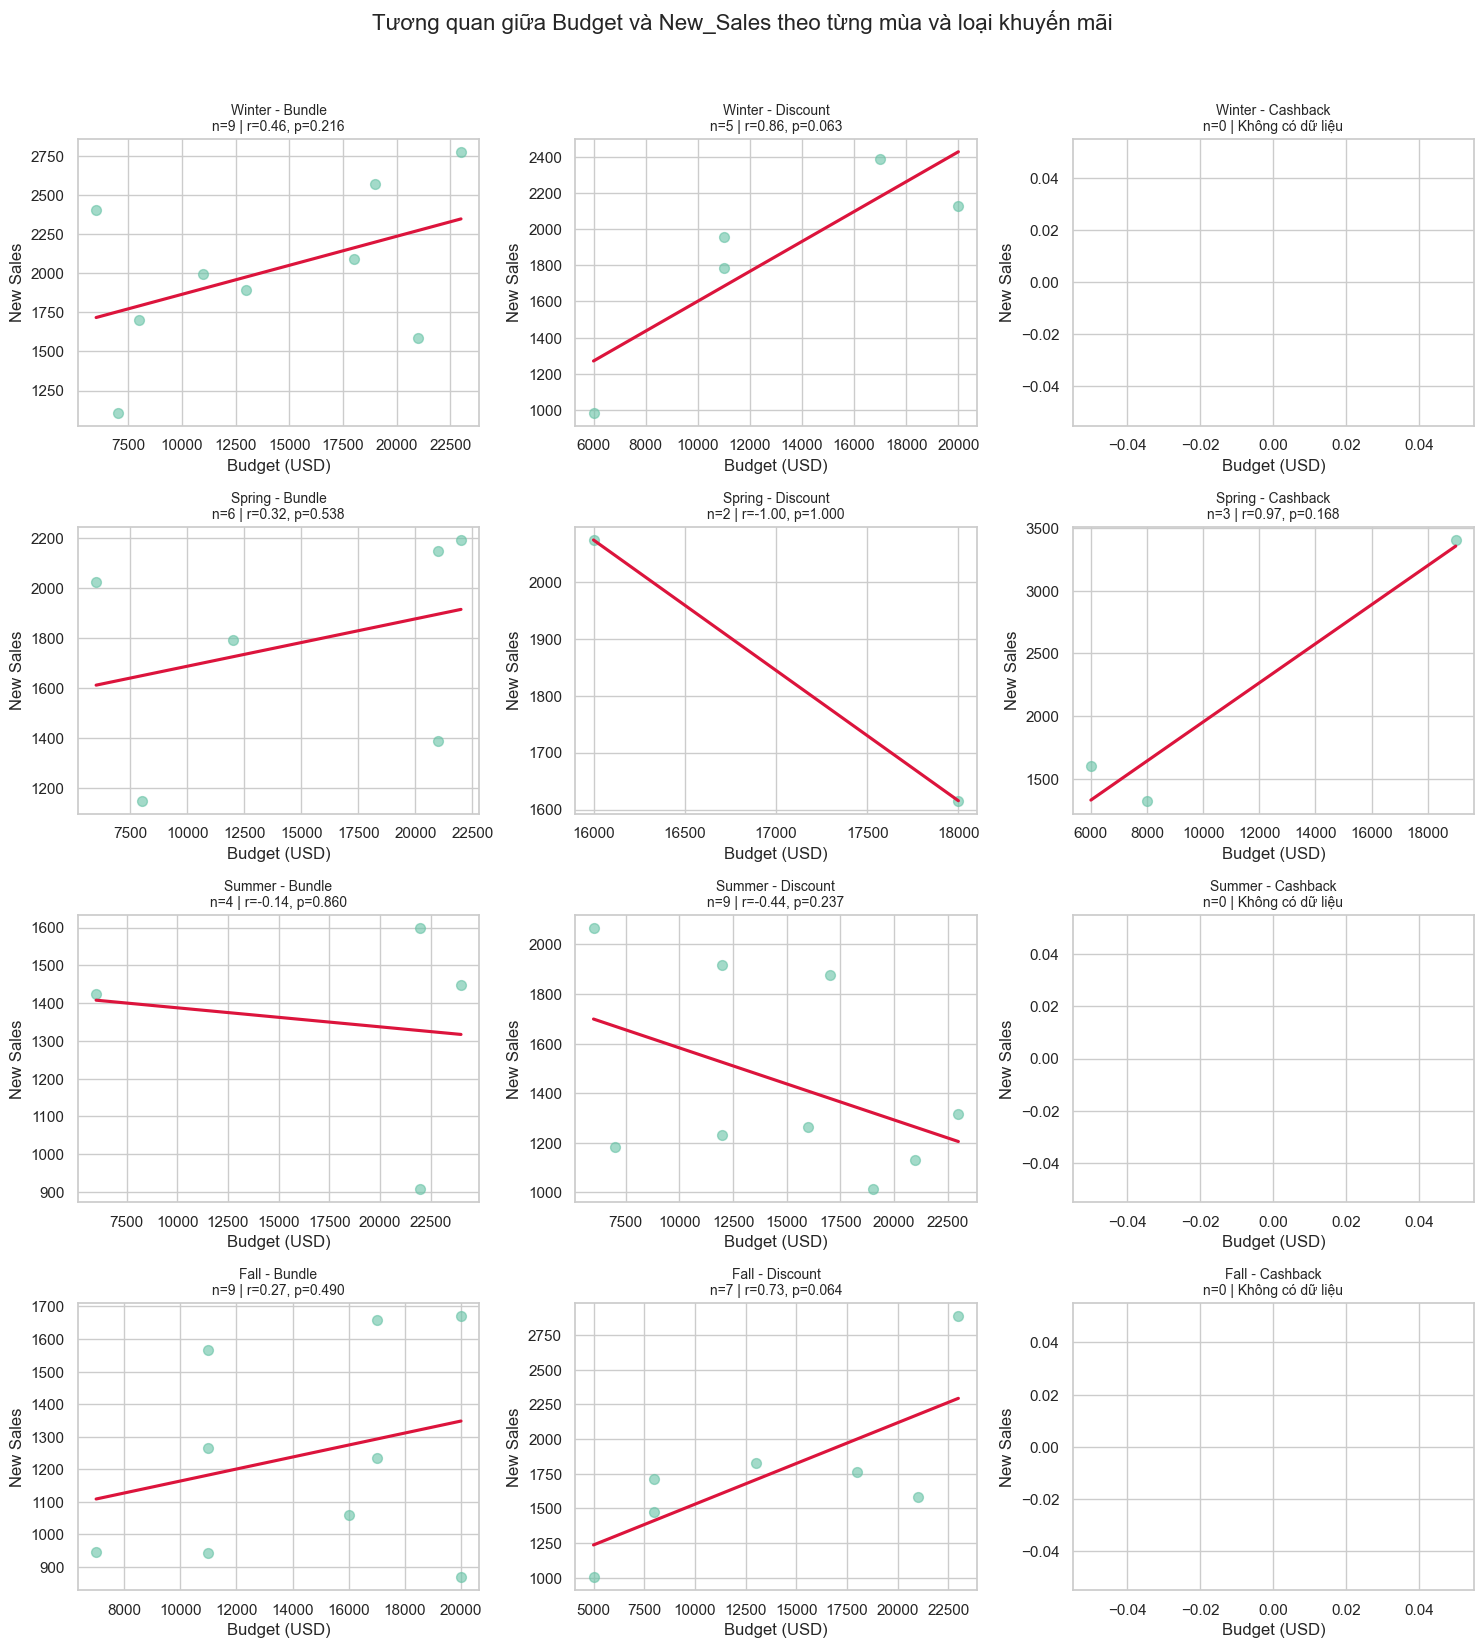

In [ ]:


def plot_correlation_by_season_and_promo(df, budget_col='Budget_USD', sales_col='New_Sales'):
    # L·ªçc c√°c d√≤ng c√≥ promo th·∫≠t
    df = df[df['Promo_Type'] != 'Non_Promo'].copy()
    df = df.dropna(subset=[budget_col, sales_col, 'Season'])

    # Danh s√°ch m√πa v√† lo·∫°i promo
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    promo_types = df['Promo_Type'].unique()
    num_cols = len(promo_types)
    num_rows = len(seasons)

    plt.figure(figsize=(5 * num_cols, 4.2 * num_rows))

    plot_index = 1
    for i, season in enumerate(seasons):
        for j, promo in enumerate(promo_types):
            subset = df[(df['Season'] == season) & (df['Promo_Type'] == promo)]

            plt.subplot(num_rows, num_cols, plot_index)

            if len(subset) >= 2:
                r, p = pearsonr(subset[budget_col], subset[sales_col])
                title = f"{season} - {promo}\nn={len(subset)} | r={r:.2f}, p={p:.3f}"
            elif len(subset) == 1:
                title = f"{season} - {promo}\nn=1 | Kh√¥ng ƒë·ªß d·ªØ li·ªáu"
            else:
                title = f"{season} - {promo}\nn=0 | Kh√¥ng c√≥ d·ªØ li·ªáu"

            sns.regplot(
                data=subset,
                x=budget_col,
                y=sales_col,
                scatter_kws={'s': 50, 'alpha': 0.6},
                line_kws={'color': 'crimson'},
                ci=None
            )
            plt.title(title, fontsize=10)
            plt.xlabel("Budget (USD)")
            plt.ylabel("New Sales")
            plt.grid(True)

            plot_index += 1

    plt.suptitle("T∆∞∆°ng quan gi·ªØa Budget v√† New_Sales theo t·ª´ng m√πa v√† lo·∫°i khuy·∫øn m√£i", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# G·ªçi h√†m:
plot_correlation_by_season_and_promo(merged_df)


üìå 1. Winter (M√πa ƒê√¥ng)
Bundle:

r = 0.46, p = 0.216, m·ªëi t∆∞∆°ng quan d∆∞∆°ng nh·∫π, nh∆∞ng kh√¥ng c√≥ √Ω nghƒ©a th·ªëng k√™.

‚Üí Ng√¢n s√°ch tƒÉng c√≥ th·ªÉ gi√∫p tƒÉng doanh s·ªë, nh∆∞ng ch∆∞a r√µ r√†ng.

Discount:

r = 0.86, p = 0.063, m·ªëi t∆∞∆°ng quan d∆∞∆°ng r·∫•t m·∫°nh, g·∫ßn ƒë·∫°t m·ª©c √Ω nghƒ©a th·ªëng k√™.

‚Üí Khuy·∫øn m√£i d·∫°ng gi·∫£m gi√° v√†o m√πa ƒë√¥ng r·∫•t hi·ªáu qu·∫£, ƒë·∫∑c bi·ªát khi ng√¢n s√°ch cao.

Cashback:

Kh√¥ng c√≥ d·ªØ li·ªáu.

üìå 2. Spring (M√πa Xu√¢n)
Bundle:

r = 0.32, p = 0.538, t∆∞∆°ng quan y·∫øu v√† kh√¥ng ƒë√°ng k·ªÉ.

Discount:

r = 1.00, p = 1.000, c√≥ v·∫ª ch·ªâ c√≥ 2 ƒëi·ªÉm d·ªØ li·ªáu n√™n kh√¥ng ƒë√°ng tin c·∫≠y.

Cashback:

r = 0.97, p = 0.168, t∆∞∆°ng quan r·∫•t m·∫°nh nh∆∞ng d·ªØ li·ªáu c√≤n h·∫°n ch·∫ø.

üìå 3. Summer (M√πa H√®)
Bundle:

r = -0.14, p = 0.860, g·∫ßn nh∆∞ kh√¥ng c√≥ t∆∞∆°ng quan.

Discount:

r = -0.44, p = 0.237, c√≥ xu h∆∞·ªõng ng∆∞·ª£c chi·ªÅu (ng√¢n s√°ch cao ‚Üí sales th·∫•p), nh∆∞ng ch∆∞a ƒë√°ng k·ªÉ.

Cashback:

Kh√¥ng c√≥ d·ªØ li·ªáu.

üìå 4. Fall (M√πa Thu)
Bundle:

r = 0.27, p = 0.490, t∆∞∆°ng quan nh·∫π v√† kh√¥ng ƒë√°ng k·ªÉ.

Discount:

r = 0.73, p = 0.064, t∆∞∆°ng quan m·∫°nh, g·∫ßn ƒë·∫°t m·ª©c √Ω nghƒ©a th·ªëng k√™.

‚Üí Gi·ªëng nh∆∞ m√πa ƒë√¥ng, discount trong m√πa thu ho·∫°t ƒë·ªông kh√° t·ªët khi ƒë∆∞·ª£c ƒë·∫ßu t∆∞ ng√¢n s√°ch cao.

Cashback:

Kh√¥ng c√≥ d·ªØ li·ªáu.

=> ƒë·∫ßu t∆∞ discount v√†o thu ƒë√¥ng

In [ ]:

# === STEP 1: Ti·ªÅn x·ª≠ l√Ω ===
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# Doanh s·ªë trung b√¨nh to√†n dataset
overall_mean_sales = df['New_Sales'].mean()

# T·∫°o c√°c c·ªôt t-1
df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)

# === STEP 2: Ph√¢n t√≠ch ri√™ng Cashback ===
cashback_df = df[df['Promo_t'] == 'Cashback'].copy()
cashback_df['Was_Weak_Before'] = cashback_df['Sales_t-1'] < overall_mean_sales
cashback_df['Sales_Improved'] = cashback_df['New_Sales'] > cashback_df['Sales_t-1']

# T·ªïng h·ª£p k·∫øt qu·∫£
total_cashbacks = len(cashback_df)
weak_before = cashback_df['Was_Weak_Before'].sum()
improved = cashback_df['Sales_Improved'].sum()
both_conditions = ((cashback_df['Was_Weak_Before']) & (cashback_df['Sales_Improved'])).sum()

print("üîç PH√ÇN T√çCH CASHBACK:")
print(f"T·ªïng l·∫ßn xu·∫•t hi·ªán Cashback: {total_cashbacks}")
print(f"Tr∆∞·ªõc ƒë√≥ c√≥ d·∫•u hi·ªáu '·∫ø' (< trung b√¨nh): {weak_before} ({weak_before/total_cashbacks:.0%})")
print(f"Doanh s·ªë tƒÉng sau Cashback: {improved} ({improved/total_cashbacks:.0%})")
print(f"C·∫£ 2 ƒëi·ªÅu ki·ªán ƒë√∫ng: {both_conditions} ({both_conditions/total_cashbacks:.0%})")

cashback_detail = cashback_df[['Year', 'Month', 'Sales_t-1', 'New_Sales', 'Was_Weak_Before', 'Sales_Improved']]

# === STEP 3: So s√°nh % tƒÉng doanh s·ªë v·ªõi c√°c khuy·∫øn m√£i kh√°c ===
df_promo = df[df['Promo_t'] != 'Non_Promo'].dropna(subset=['Sales_t-1'])
df_promo['Sales_Growth_%'] = ((df_promo['New_Sales'] - df_promo['Sales_t-1']) / df_promo['Sales_t-1']) * 100

# T√≠nh trung b√¨nh theo lo·∫°i
growth_summary = df_promo.groupby('Promo_t')['Sales_Growth_%'].agg(['mean', 'std', 'count']).round(2)
print("\nTrung b√¨nh % tƒÉng doanh s·ªë theo lo·∫°i khuy·∫øn m√£i:")
print(growth_summary)

# So s√°nh th·ªëng k√™ gi·ªØa Cashback v√† c√°c lo·∫°i kh√°c
cashback_growth = df_promo[df_promo['Promo_t'] == 'Cashback']['Sales_Growth_%']
discount_growth = df_promo[df_promo['Promo_t'] == 'Discount']['Sales_Growth_%']
bundle_growth = df_promo[df_promo['Promo_t'] == 'Bundle']['Sales_Growth_%']

print("\n So s√°nh Cashback vs Discount:")
t_stat1, p_val1 = ttest_ind(cashback_growth, discount_growth, equal_var=False)
print(f"  ‚û§ t = {t_stat1:.2f}, p = {p_val1:.4f}")

print("\nSo s√°nh Cashback vs Bundle:")
t_stat2, p_val2 = ttest_ind(cashback_growth, bundle_growth, equal_var=False)
print(f"  ‚û§ t = {t_stat2:.2f}, p = {p_val2:.4f}")

# Hi·ªÉn th·ªã b·∫£ng chi ti·∫øt n·∫øu c·∫ßn
from IPython.display import display
display(cashback_detail)


üîç PH√ÇN T√çCH CASHBACK:
T·ªïng l·∫ßn xu·∫•t hi·ªán Cashback: 3
Tr∆∞·ªõc ƒë√≥ c√≥ d·∫•u hi·ªáu '·∫ø' (< trung b√¨nh): 2 (67%)
Doanh s·ªë tƒÉng sau Cashback: 3 (100%)
C·∫£ 2 ƒëi·ªÅu ki·ªán ƒë√∫ng: 2 (67%)

Trung b√¨nh % tƒÉng doanh s·ªë theo lo·∫°i khuy·∫øn m√£i:
           mean    std  count
Promo_t                      
Bundle    33.30  24.12     28
Cashback  36.63  13.19      3
Discount  45.62  22.02     23

 So s√°nh Cashback vs Discount:
  ‚û§ t = -1.01, p = 0.3742

So s√°nh Cashback vs Bundle:
  ‚û§ t = 0.37, p = 0.7285


Year  Month    Sales_t-1    New_Sales  Was_Weak_Before  Sales_Improved
88   2002      5  1044.024096  1325.174995             True            True
134  2006      3  1217.294512  1598.479152             True            True
351  2024      4  2244.864957  3404.428595            False            True

 K·∫øt lu·∫≠n s∆° b·ªô: C√≥ d·∫•u hi·ªáu ·ªßng h·ªô gi·∫£ thuy·∫øt r·∫±ng Cashback ƒë∆∞·ª£c s·ª≠ d·ª•ng nh∆∞ m·ªôt bi·ªán ph√°p "gi·∫£i c·ª©u" khi doanh s·ªë y·∫øu, v√† c√≥ hi·ªáu qu·∫£ trong vi·ªác k√©o doanh s·ªë l√™n.

 Cashback kh√¥ng c√≥ m·ª©c tƒÉng cao nh·∫•t v·ªÅ trung b√¨nh (thua Discount).

Std th·∫•p nh·∫•t ‚Üí t·ª©c l√† hi·ªáu qu·∫£ ·ªïn ƒë·ªãnh h∆°n c√°c lo·∫°i kh√°c.

Tuy nhi√™n, s·ªë l·∫ßn xu·∫•t hi·ªán ch·ªâ c√≥ 3 n√™n c·∫ßn c·∫©n tr·ªçng v·ªõi ƒë·ªô tin c·∫≠y th·ªëng k√™.

Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Cashback < Discount

Kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng ƒë·ªÉ k·∫øt lu·∫≠n Cashback > Bundle

Cashback c√≥ v·∫ª ƒë∆∞·ª£c d√πng khi doanh s·ªë sweater y·∫øu v√† mang l·∫°i hi·ªáu qu·∫£ tƒÉng tr∆∞·ªüng r√µ r√†ng.

Nh∆∞ng kh√¥ng v∆∞·ª£t tr·ªôi h∆°n v·ªÅ m·ª©c ƒë·ªô tƒÉng sales trung b√¨nh so v·ªõi Discount.

N√™n ti·∫øp t·ª•c theo d√µi n·∫øu c√≥ th√™m d·ªØ li·ªáu Cashback trong t∆∞∆°ng lai ƒë·ªÉ x√°c nh·∫≠n xu h∆∞·ªõng n√†y m·ªôt c√°ch th·ªëng k√™ ƒë√°ng tin c·∫≠y h∆°n.


In [ ]:
# === STEP 4: Ki·ªÉm tra c√≥ b·ªã '·∫ø' v√†o m√πa ƒë√¥ng tr∆∞·ªõc khi d√πng Cashback kh√¥ng ===

# T·∫°o c·ªôt m√πa t·ª´ th√°ng
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['Season'] = df['Month'].apply(assign_season)

# L·∫•y nƒÉm c√≥ Cashback
cashback_years = cashback_df['Year'].unique()

# Trung b√¨nh doanh s·ªë to√†n b·ªô
overall_mean_sales = df['New_Sales'].mean()

# Ki·ªÉm tra t·ª´ng nƒÉm xem c√≥ '·∫ø' m√πa ƒë√¥ng kh√¥ng
print("\nüìâ Ki·ªÉm tra c√°c nƒÉm d√πng Cashback c√≥ b·ªã '·∫ø' v√†o m√πa ƒë√¥ng tr∆∞·ªõc ƒë√≥ kh√¥ng:")

winter_check = []

for year in cashback_years:
    # M√πa ƒë√¥ng c·ªßa nƒÉm ƒë√≥ g·ªìm th√°ng 12 nƒÉm tr∆∞·ªõc + th√°ng 1, 2 nƒÉm hi·ªán t·∫°i
    winter_months = df[((df['Year'] == year - 1) & (df['Month'] == 12)) |
                       ((df['Year'] == year) & (df['Month'].isin([1, 2])))]
    
    avg_winter_sales = winter_months['New_Sales'].mean()
    is_weak_winter = avg_winter_sales < overall_mean_sales

    winter_check.append({
        'Year': year,
        'Winter Avg Sales': round(avg_winter_sales, 2),
        'Is Winter Weak?': is_weak_winter
    })

# Hi·ªÉn th·ªã k·∫øt qu·∫£
winter_df = pd.DataFrame(winter_check)
print(winter_df)



üìâ Ki·ªÉm tra c√°c nƒÉm d√πng Cashback c√≥ b·ªã '·∫ø' v√†o m√πa ƒë√¥ng tr∆∞·ªõc ƒë√≥ kh√¥ng:
   Year  Winter Avg Sales  Is Winter Weak?
0  2002            929.23             True
1  2006           1095.09             True
2  2024           1978.52            False


In [ ]:
# === X·∫øp h·∫°ng ƒë·ªô th·∫•p c·ªßa doanh s·ªë m√πa ƒë√¥ng to√†n k·ª≥ ===

# B∆∞·ªõc 1: T√≠nh trung b√¨nh doanh s·ªë m√πa ƒë√¥ng to√†n b·ªô dataset
all_winters = []

for year in df['Year'].unique():
    winter_months = df[((df['Year'] == year - 1) & (df['Month'] == 12)) |
                       ((df['Year'] == year) & (df['Month'].isin([1, 2])))]
    
    if not winter_months.empty:
        avg_sales = winter_months['New_Sales'].mean()
        all_winters.append({
            'Year': year,
            'Winter Avg Sales': avg_sales
        })

all_winters_df = pd.DataFrame(all_winters)

# B∆∞·ªõc 2: X·∫øp h·∫°ng t·ª´ m√πa ƒë√¥ng c√≥ doanh s·ªë th·∫•p nh·∫•t (rank 1 = ·∫ø nh·∫•t)
all_winters_df['Winter Rank (Low=1)'] = all_winters_df['Winter Avg Sales'].rank(method='min', ascending=True).astype(int)

# B∆∞·ªõc 3: G·∫Øn th√™m th√¥ng tin c√≥ d√πng Cashback kh√¥ng
all_winters_df['Used Cashback After?'] = all_winters_df['Year'].isin(cashback_years)

# B∆∞·ªõc 4: In b·∫£ng x·∫øp h·∫°ng
print("\nüìä X·∫øp h·∫°ng m·ª©c ƒë·ªô '·∫ø' c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥ (doanh s·ªë th·∫•p x·∫øp h·∫°ng cao):")
print(all_winters_df.sort_values('Winter Rank (Low=1)')[['Year', 'Winter Avg Sales', 'Winter Rank (Low=1)', 'Used Cashback After?']])



üìä X·∫øp h·∫°ng m·ª©c ƒë·ªô '·∫ø' c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥ (doanh s·ªë th·∫•p x·∫øp h·∫°ng cao):
    Year  Winter Avg Sales  Winter Rank (Low=1)  Used Cashback After?
2   1997        798.536354                    1                 False
3   1998        802.240452                    2                 False
4   1999        857.746379                    3                 False
1   1996        866.442313                    4                 False
5   2000        900.617552                    5                 False
7   2002        929.233845                    6                  True
0   1995        955.053531                    7                 False
8   2003        968.606251                    8                 False
6   2001        975.185027                    9                 False
9   2004       1020.078576                   10                 False
11  2006       1095.087983                   11                  True
12  2007       1167.956400                   12    

In [ ]:
all_winters_df[all_winters_df['Used Cashback After?']]


Year  Winter Avg Sales  Winter Rank (Low=1)  Used Cashback After?
7   2002        929.233845                    6                  True
11  2006       1095.087983                   11                  True
29  2024       1978.516572                   28                  True

In [ ]:

# === STEP 1: Ti·ªÅn x·ª≠ l√Ω ===
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)

# === STEP 2: Ph√¢n t√≠ch ri√™ng Cashback ===
overall_mean_sales = df['New_Sales'].mean()
cashback_df = df[df['Promo_t'] == 'Cashback'].copy()
cashback_df['Was_Weak_Before'] = cashback_df['Sales_t-1'] < overall_mean_sales
cashback_df['Sales_Improved'] = cashback_df['New_Sales'] > cashback_df['Sales_t-1']

total_cashbacks = len(cashback_df)
weak_before = cashback_df['Was_Weak_Before'].sum()
improved = cashback_df['Sales_Improved'].sum()
both_conditions = ((cashback_df['Was_Weak_Before']) & (cashback_df['Sales_Improved'])).sum()

print(" PH√ÇN T√çCH CASHBACK:")
print(f"T·ªïng l·∫ßn xu·∫•t hi·ªán Cashback: {total_cashbacks}")
print(f"Tr∆∞·ªõc ƒë√≥ c√≥ d·∫•u hi·ªáu '·∫ø' (< trung b√¨nh): {weak_before} ({weak_before/total_cashbacks:.0%})")
print(f"Doanh s·ªë tƒÉng sau Cashback: {improved} ({improved/total_cashbacks:.0%})")
print(f"C·∫£ 2 ƒëi·ªÅu ki·ªán ƒë√∫ng: {both_conditions} ({both_conditions/total_cashbacks:.0%})")

cashback_detail = cashback_df[['Year', 'Month', 'Sales_t-1', 'New_Sales', 'Was_Weak_Before', 'Sales_Improved']]

# === STEP 3: So s√°nh % tƒÉng doanh s·ªë v·ªõi c√°c khuy·∫øn m√£i kh√°c ===
df_promo = df[df['Promo_t'] != 'Non_Promo'].dropna(subset=['Sales_t-1'])
df_promo['Sales_Growth_%'] = ((df_promo['New_Sales'] - df_promo['Sales_t-1']) / df_promo['Sales_t-1']) * 100

growth_summary = df_promo.groupby('Promo_t')['Sales_Growth_%'].agg(['mean', 'std', 'count']).round(2)
print("\n Trung b√¨nh % tƒÉng doanh s·ªë theo lo·∫°i khuy·∫øn m√£i:")
print(growth_summary)

cashback_growth = df_promo[df_promo['Promo_t'] == 'Cashback']['Sales_Growth_%']
discount_growth = df_promo[df_promo['Promo_t'] == 'Discount']['Sales_Growth_%']
bundle_growth = df_promo[df_promo['Promo_t'] == 'Bundle']['Sales_Growth_%']

print("\n So s√°nh Cashback vs Discount:")
t_stat1, p_val1 = ttest_ind(cashback_growth, discount_growth, equal_var=False)
print(f"  ‚û§ t = {t_stat1:.2f}, p = {p_val1:.4f}")

print("\n So s√°nh Cashback vs Bundle:")
t_stat2, p_val2 = ttest_ind(cashback_growth, bundle_growth, equal_var=False)
print(f"  ‚û§ t = {t_stat2:.2f}, p = {p_val2:.4f}")

# === STEP 4: Ki·ªÉm tra m√πa ƒë√¥ng tr∆∞·ªõc khi d√πng Cashback ===
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df['Season'] = df['Month'].apply(assign_season)
cashback_years = cashback_df['Year'].unique()

print("\n Ki·ªÉm tra c√°c nƒÉm d√πng Cashback c√≥ b·ªã '·∫ø' v√†o m√πa ƒë√¥ng tr∆∞·ªõc ƒë√≥ kh√¥ng:")
winter_check = []

for year in cashback_years:
    winter_months = df[((df['Year'] == year - 1) & (df['Month'] == 12)) |
                       ((df['Year'] == year) & (df['Month'].isin([1, 2])))]
    avg_winter_sales = winter_months['New_Sales'].mean()
    is_weak = avg_winter_sales < overall_mean_sales

    winter_check.append({
        'Year': year,
        'Winter Avg Sales': round(avg_winter_sales, 2),
        'Is Winter Weak?': is_weak
    })

winter_df = pd.DataFrame(winter_check)
print(winter_df)

# === STEP 5: X·∫øp h·∫°ng ƒë·ªô ‚Äú·∫ø‚Äù c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥ ===
all_winters = []

for year in df['Year'].unique():
    winter_months = df[((df['Year'] == year - 1) & (df['Month'] == 12)) |
                       ((df['Year'] == year) & (df['Month'].isin([1, 2])))]
    if not winter_months.empty:
        avg_sales = winter_months['New_Sales'].mean()
        all_winters.append({
            'Year': year,
            'Winter Avg Sales': avg_sales
        })

all_winters_df = pd.DataFrame(all_winters)
all_winters_df['Winter Rank (Low=1)'] = all_winters_df['Winter Avg Sales'].rank(method='min', ascending=True).astype(int)
all_winters_df['Used Cashback After?'] = all_winters_df['Year'].isin(cashback_years)

print("\n X·∫øp h·∫°ng m·ª©c ƒë·ªô '·∫ø' c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥:")
print(all_winters_df.sort_values('Winter Rank (Low=1)')[['Year', 'Winter Avg Sales', 'Winter Rank (Low=1)', 'Used Cashback After?']])


 PH√ÇN T√çCH CASHBACK:
T·ªïng l·∫ßn xu·∫•t hi·ªán Cashback: 3
Tr∆∞·ªõc ƒë√≥ c√≥ d·∫•u hi·ªáu '·∫ø' (< trung b√¨nh): 2 (67%)
Doanh s·ªë tƒÉng sau Cashback: 3 (100%)
C·∫£ 2 ƒëi·ªÅu ki·ªán ƒë√∫ng: 2 (67%)

 Trung b√¨nh % tƒÉng doanh s·ªë theo lo·∫°i khuy·∫øn m√£i:
           mean    std  count
Promo_t                      
Bundle    33.30  24.12     28
Cashback  36.63  13.19      3
Discount  45.62  22.02     23

 So s√°nh Cashback vs Discount:
  ‚û§ t = -1.01, p = 0.3742

 So s√°nh Cashback vs Bundle:
  ‚û§ t = 0.37, p = 0.7285

 Ki·ªÉm tra c√°c nƒÉm d√πng Cashback c√≥ b·ªã '·∫ø' v√†o m√πa ƒë√¥ng tr∆∞·ªõc ƒë√≥ kh√¥ng:
   Year  Winter Avg Sales  Is Winter Weak?
0  2002            929.23             True
1  2006           1095.09             True
2  2024           1978.52            False

 X·∫øp h·∫°ng m·ª©c ƒë·ªô '·∫ø' c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥:
    Year  Winter Avg Sales  Winter Rank (Low=1)  Used Cashback After?
2   1997        798.536354                    1                 Fal

In [ ]:
print("\nüìä X·∫øp h·∫°ng m·ª©c ƒë·ªô '·∫ø' c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥:")
print(all_winters_df.sort_values('Winter Rank (Low=1)')[['Year', 'Winter Avg Sales', 'Winter Rank (Low=1)', 'Used Cashback After?']])



üìä X·∫øp h·∫°ng m·ª©c ƒë·ªô '·∫ø' c·ªßa c√°c m√πa ƒë√¥ng to√†n k·ª≥:
    Year  Winter Avg Sales  Winter Rank (Low=1)  Used Cashback After?
2   1997        798.536354                    1                 False
3   1998        802.240452                    2                 False
4   1999        857.746379                    3                 False
1   1996        866.442313                    4                 False
5   2000        900.617552                    5                 False
7   2002        929.233845                    6                  True
0   1995        955.053531                    7                 False
8   2003        968.606251                    8                 False
6   2001        975.185027                    9                 False
9   2004       1020.078576                   10                 False
11  2006       1095.087983                   11                  True
12  2007       1167.956400                   12                 False
10  2005       122

In [ ]:
all_winters_df[all_winters_df['Used Cashback After?']]

Year  Winter Avg Sales  Winter Rank (Low=1)  Used Cashback After?
7   2002        929.233845                    6                  True
11  2006       1095.087983                   11                  True
29  2024       1978.516572                   28                  True

In [93]:
import pandas as pd

# B∆∞·ªõc 1: S·∫Øp x·∫øp d·ªØ li·ªáu v√† ƒë√°nh d·∫•u Has_Promo
merged_df = merged_df.sort_values(by=['Year', 'Month']).copy()
merged_df['Has_Promo'] = (merged_df['Promo_Type'] != 'Non_Promo').astype(int)
merged_df['Time_ID'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(DAY=1))

# B∆∞·ªõc 2: L·∫•y doanh s·ªë th√°ng tr∆∞·ªõc v√† sau
merged_df['Prev_Sales'] = merged_df['New_Sales'].shift(1)
merged_df['Prev_Has_Promo'] = merged_df['Has_Promo'].shift(1)
merged_df['Prev_Year'] = merged_df['Year'].shift(1)
merged_df['Prev_Month'] = merged_df['Month'].shift(1)

merged_df['Next_Sales'] = merged_df['New_Sales'].shift(-1)
merged_df['Next_Has_Promo'] = merged_df['Has_Promo'].shift(-1)
merged_df['Next_Year'] = merged_df['Year'].shift(-1)
merged_df['Next_Month'] = merged_df['Month'].shift(-1)

# B∆∞·ªõc 3: ƒêi·ªÅu ki·ªán li·ªÅn k·ªÅ b·∫±ng logic th√°ng
def is_prev_month(y1, m1, y2, m2):
    return (y1 == y2 and m1 - 1 == m2) or (y1 - 1 == y2 and m1 == 1 and m2 == 12)

def is_next_month(y1, m1, y2, m2):
    return (y1 == y2 and m1 + 1 == m2) or (y1 + 1 == y2 and m1 == 12 and m2 == 1)

mask = (
    (merged_df['Has_Promo'] == 1) &
    (merged_df['Prev_Has_Promo'] == 0) &
    (merged_df['Next_Has_Promo'] == 0) &
    merged_df.apply(lambda row: is_prev_month(row['Year'], row['Month'], row['Prev_Year'], row['Prev_Month']), axis=1) &
    merged_df.apply(lambda row: is_next_month(row['Year'], row['Month'], row['Next_Year'], row['Next_Month']), axis=1)
)

# B∆∞·ªõc 4: √Åp d·ª•ng mask v√† t√≠nh % thay ƒë·ªïi
df = merged_df[mask].copy()
df['Change_%_Before'] = ((df['New_Sales'] - df['Prev_Sales']) / df['Prev_Sales']) * 100
df['Change_%_After'] = ((df['Next_Sales'] - df['New_Sales']) / df['New_Sales']) * 100

# L√†m tr√≤n
df['Change_%_Before'] = df['Change_%_Before'].round(2)
df['Change_%_After'] = df['Change_%_After'].round(2)

# B∆∞·ªõc 5: L·ªçc c·ªôt hi·ªÉn th·ªã
result = df[['Year', 'Month', 'Promo_Type',  'Change_%_Before', 'Change_%_After']]

# In k·∫øt qu·∫£
print("C√°c th√°ng c√≥ promo ƒë∆°n l·∫ª (tr∆∞·ªõc v√† sau kh√¥ng promo):")
print(result.tail(20))


C√°c th√°ng c√≥ promo ƒë∆°n l·∫ª (tr∆∞·ªõc v√† sau kh√¥ng promo):
            Year  Month Promo_Type  Change_%_Before  Change_%_After
Date                                                               
2005-08-01  2005      8   Discount            44.13          -33.69
2006-03-01  2006      3   Cashback            31.31          -20.55
2007-07-01  2007      7     Bundle            32.98          -36.00
2007-11-01  2007     11   Discount            71.50          -34.29
2009-11-01  2009     11   Discount            43.09          -14.09
2011-12-01  2011     12     Bundle            46.74          -25.55
2013-11-01  2013     11     Bundle            46.64          -28.07
2014-01-01  2014      1     Bundle            57.46          -19.75
2015-06-01  2015      6   Discount            43.76          -39.61
2016-01-01  2016      1   Discount            77.54          -34.43
2016-05-01  2016      5     Bundle            45.34          -40.68
2016-10-01  2016     10   Discount            69.0

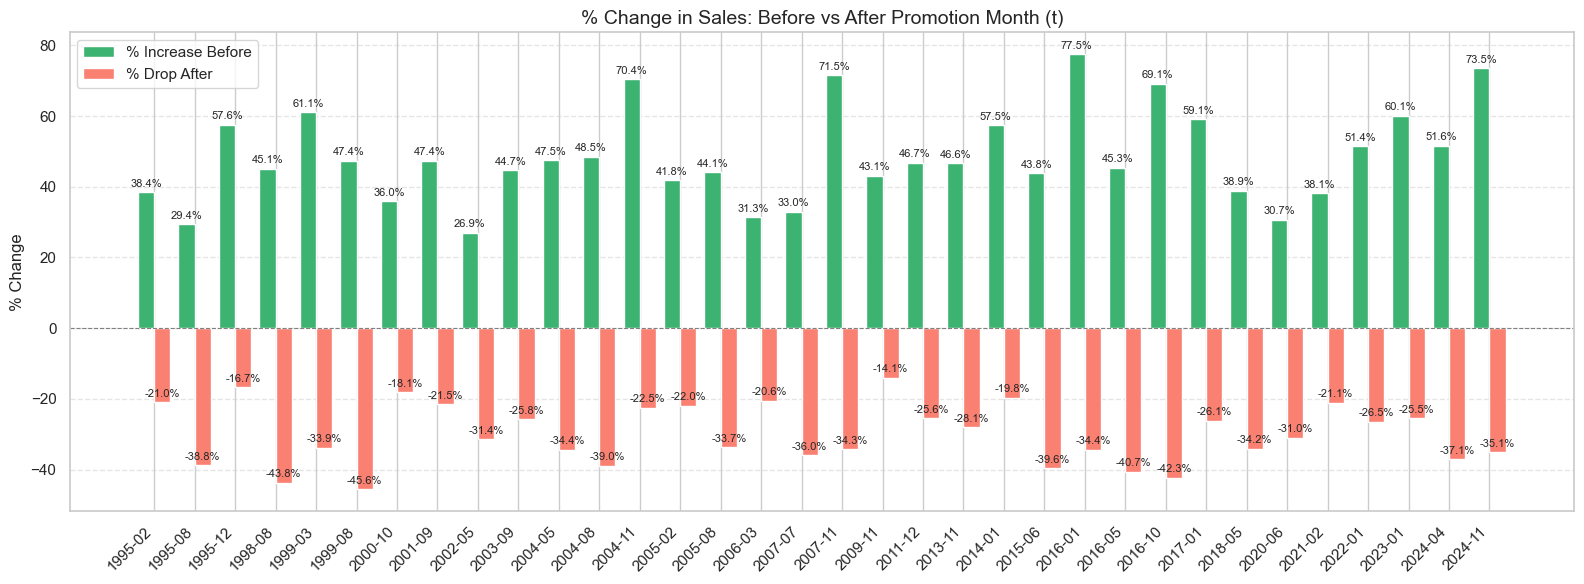

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# T·∫°o x-labels
labels = [f"{int(y)}-{int(m):02d}" for y, m in zip(result['Year'], result['Month'])]
x = np.arange(len(labels))

# D·ªØ li·ªáu
before = result['Change_%_Before']
after = result['Change_%_After']

# V·∫Ω bar chart
plt.figure(figsize=(16, 6))
bar1 = plt.bar(x - 0.2, before, width=0.4, label='% Increase Before', color='mediumseagreen')
bar2 = plt.bar(x + 0.2, after, width=0.4, label='% Drop After', color='salmon')

# G·∫Øn nh√£n gi√° tr·ªã tr√™n m·ªói c·ªôt
for i in range(len(x)):
    plt.text(x[i] - 0.2, before.iloc[i] + 1, f"{before.iloc[i]:.1f}%", ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + 0.2, after.iloc[i] + 1, f"{after.iloc[i]:.1f}%", ha='center', va='bottom', fontsize=8)

# Labeling
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('% Change')
plt.title('% Change in Sales: Before vs After Promotion Month (t)', fontsize=14)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Khuy·∫øn m√£i gi√∫p tƒÉng doanh s·ªë sweater r·∫•t hi·ªáu qu·∫£ trong ng·∫Øn h·∫°n, v·ªõi m·ª©c tƒÉng trung b√¨nh kh√° cao.
Tuy nhi√™n, hi·ªáu ·ª©ng n√†y kh√¥ng k√©o d√†i ‚Äì g·∫ßn nh∆∞ to√†n b·ªô c√°c th√°ng sau promo ƒë·ªÅu ch·ª©ng ki·∫øn doanh s·ªë gi·∫£m m·∫°nh.

Discount l√† h√¨nh th·ª©c duy nh·∫•t trong top n√†y, cho th·∫•y kh·∫£ nƒÉng tƒÉng m·∫°nh doanh s·ªë ngay t·∫°i th√°ng tri·ªÉn khai.

C√°c th√°ng n√†y c√≥ th·ªÉ l√† d·ªãp ƒë·∫∑c bi·ªát (nƒÉm m·ªõi, cu·ªëi nƒÉm, sale l·ªõn) khi·∫øn discount ph√°t huy t·ªëi ƒëa hi·ªáu qu·∫£.

G·ª£i √Ω: n√™n ti·∫øp t·ª•c ƒë·∫©y m·∫°nh Discount v√†o nh·ªØng d·ªãp t∆∞∆°ng t·ª±, ƒë·∫∑c bi·ªát l√† ƒë·∫ßu v√† cu·ªëi nƒÉm.




Nh√¨n chung th√¨ nh·ªØng ƒë·ª£t cu·ªëi nƒÉm, ƒë·∫ßu nƒÉm (thu ƒë√¥ng) c√≥ xu h∆∞·ªõng mang l·∫°i hi·ªáu qu·∫£ promo t·ªët nh·∫•t.

In [ ]:


# Copy v√† x·ª≠ l√Ω d·ªØ li·ªáu
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# T·∫°o doanh s·ªë th√°ng tr∆∞·ªõc v√† sau
df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Sales_t+1'] = df['New_Sales'].shift(-1)

# G·∫Øn promo th√°ng tr∆∞·ªõc v√† sau
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)
df['Promo_t+1'] = df['Promo_Type'].shift(-1)

# Ch·ªâ l·∫•y th√°ng c√≥ khuy·∫øn m√£i
promo_df = df[df['Promo_t'] != 'Non_Promo'].copy()

# B·ªè nh·ªØng d√≤ng thi·∫øu d·ªØ li·ªáu
promo_df = promo_df.dropna(subset=['Sales_t-1', 'Sales_t+1', 'Budget_USD'])

#b·ªè promo tr∆∞·ªõc v√† sau:
promo_df = promo_df[
    (promo_df['Promo_t-1'] == 'Non_Promo') &
    (promo_df['Promo_t+1'] == 'Non_Promo')
].copy()

# T√≠nh % thay ƒë·ªïi tr∆∞·ªõc v√† sau
promo_df['Change_%_Before'] = ((promo_df['New_Sales'] - promo_df['Sales_t-1']) / promo_df['Sales_t-1']) * 100
promo_df['Change_%_After'] = ((promo_df['Sales_t+1'] - promo_df['New_Sales']) / promo_df['New_Sales']) * 100
promo_df['Month'] = promo_df['Month'].astype(int)

# Ph√¢n t√≠ch t·ªïng h·ª£p theo lo·∫°i khuy·∫øn m√£i
summary = promo_df.groupby('Promo_t').agg({
    'Change_%_Before': ['mean', 'std', 'count'],
    'Change_%_After': ['mean', 'std', 'count'],
    'Month': lambda x: x.value_counts().idxmax()  # Th√°ng xu·∫•t hi·ªán nhi·ªÅu nh·∫•t
}).reset_index()

# ƒê·∫∑t t√™n c·ªôt cho r√µ r√†ng
summary.columns = ['Promo_Type', 
                   'Avg_Change_Before', 'Std_Before', 'Count_Before', 
                   'Avg_Change_After', 'Std_After', 'Count_After',
                   'Most_Common_Month']

# L√†m tr√≤n cho d·ªÖ ƒë·ªçc
summary[['Avg_Change_Before', 'Avg_Change_After']] = summary[['Avg_Change_Before', 'Avg_Change_After']].round(2)

# Hi·ªÉn th·ªã k·∫øt qu·∫£
print(" Ph√¢n t√≠ch hi·ªáu qu·∫£ t·ª´ng lo·∫°i khuy·∫øn m√£i:")
display(summary.sort_values(by='Avg_Change_Before', ascending=False))  # S·∫Øp x·∫øp theo hi·ªáu ·ª©ng tr∆∞·ªõc khuy·∫øn m√£i




 Ph√¢n t√≠ch hi·ªáu qu·∫£ t·ª´ng lo·∫°i khuy·∫øn m√£i:


Promo_Type  Avg_Change_Before  Std_Before  Count_Before  Avg_Change_After  \
2   Discount              53.79   14.554604            13            -34.15   
0     Bundle              47.01   11.040555            18            -27.06   
1   Cashback              36.63   13.192420             3            -29.67   

   Std_After  Count_After  Most_Common_Month  
2   9.399860           13                  8  
0   6.831256           18                  1  
1   8.390645            3                  5

Discount gi√∫p t·∫°o "c√∫ h√≠ch" t·ªët nh·∫•t nh∆∞ng d·ªÖ r∆°i v√†o t√¨nh tr·∫°ng "ƒë·ªët l·ª±c" nhanh, kh√≥ duy tr√¨ hi·ªáu qu·∫£ sau ƒë√≥. Bundle kh√¥ng t·∫°o c√∫ h√≠ch qu√° m·∫°nh nh∆∞ng gi·ªØ ƒë∆∞·ª£c ƒë·ªô ·ªïn ƒë·ªãnh sau khuy·∫øn m√£i t·ªët nh·∫•t ‚Üí ph√π h·ª£p cho chi·∫øn l∆∞·ª£c d√†i h·∫°n

## **AFTER SALES V√Ä BEFORE SALES C·ª¶A C√ÅC TH√ÅNG LI√äN TI·∫æP C√ì PROMO**

In [ ]:


# Gi·∫£ s·ª≠ merged_df ƒë√£ s·∫µn s√†ng v√† c√≥ c√°c c·ªôt: Year, Month, New_Sales, Promo_Type
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# G√°n ch·ªâ s·ªë th·ªùi gian
df['Time_ID'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df['Has_Promo'] = (df['Promo_Type'] != 'Non_Promo').astype(int)

# T·∫°o nh√≥m li√™n ti·∫øp promo
df['Gap'] = (df['Has_Promo'] != df['Has_Promo'].shift()).cumsum()
df['Promo_Group'] = (df['Has_Promo'] == 1).astype(int) * df['Gap']
df['Promo_Group'] = df['Promo_Group'].replace(0, pd.NA)

# L·ªçc c√°c chu·ªói promo c√≥ √≠t nh·∫•t 2 th√°ng li√™n ti·∫øp
promo_groups = df.dropna(subset=['Promo_Group']).groupby('Promo_Group').filter(lambda x: len(x) >= 2).reset_index()

# Ph√¢n t√≠ch chu·ªói
result_rows = []

for group_id, group_df in promo_groups.groupby('Promo_Group'):
    group_df = group_df.sort_values('Time_ID')

    idx_first = group_df['index'].iloc[0]
    idx_last = group_df['index'].iloc[-1]

    if idx_first > 0 and idx_last + 1 < len(df):
        prev_sales = df.loc[idx_first - 1, 'New_Sales']
        after_sales = df.loc[idx_last + 1, 'New_Sales']
        during_sales = group_df['New_Sales'].mean()

        change_before = (during_sales - prev_sales) / prev_sales * 100
        change_after = (after_sales - during_sales) / during_sales * 100

        promo_seq = ', '.join(group_df['Promo_Type'].tolist())

        result_rows.append({
            'Promo_Start': df.loc[idx_first, 'Time_ID'],
            'Promo_End': df.loc[idx_last, 'Time_ID'],
            'Promo_Length': len(group_df),
            'Promo_Type_Sequence': promo_seq,
            'Before_Sales': prev_sales,
            'During_Sales_Avg': during_sales,
            'After_Sales': after_sales,
            'Change_%_Before': round(change_before, 2),
            'Change_%_After': round(change_after, 2)
        })

# T·∫°o DataFrame k·∫øt qu·∫£
promo_seq_df = pd.DataFrame(result_rows)

# In k·∫øt qu·∫£
print("üîç So s√°nh doanh s·ªë tr∆∞·ªõc v√† sau c√°c chu·ªói promo li√™n ti·∫øp (‚â• 2 th√°ng):")
print(promo_seq_df[['Promo_Start', 'Promo_End', 'Promo_Type_Sequence', 'Change_%_Before', 'Change_%_After']])


üîç So s√°nh doanh s·ªë tr∆∞·ªõc v√† sau c√°c chu·ªói promo li√™n ti·∫øp (‚â• 2 th√°ng):
  Promo_Start  Promo_End       Promo_Type_Sequence  Change_%_Before  \
0  1997-10-01 1997-11-01          Bundle, Discount            52.34   
1  1999-05-01 1999-06-01          Bundle, Discount            27.22   
2  2006-08-01 2006-09-01          Discount, Bundle            29.93   
3  2010-03-01 2010-04-01          Bundle, Discount            51.05   
4  2010-12-01 2011-01-01        Discount, Discount            82.03   
5  2011-06-01 2011-07-01          Discount, Bundle            38.35   
6  2015-01-01 2015-03-01  Discount, Bundle, Bundle            55.42   
7  2015-08-01 2015-10-01  Bundle, Discount, Bundle            35.43   
8  2017-09-01 2017-10-01          Discount, Bundle            62.06   

   Change_%_After  
0          -23.67  
1          -34.37  
2          -26.44  
3          -35.85  
4          -29.85  
5          -44.75  
6          -26.47  
7          -29.05  
8          -32.02  

## **SO S√ÅNH LI√äN TI·∫æP VS KH√îNG LI√äN TI·∫æP**

In [ ]:
import pandas as pd

# B1. Chu·∫©n b·ªã d·ªØ li·ªáu
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)
df['Time_ID'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df['Has_Promo'] = (df['Promo_Type'] != 'Non_Promo').astype(int)

# B2. T·∫°o group li√™n ti·∫øp
df['Gap'] = (df['Has_Promo'] != df['Has_Promo'].shift()).cumsum()
df['Promo_Group'] = (df['Has_Promo'] == 1).astype(int) * df['Gap']
df['Promo_Group'] = df['Promo_Group'].replace(0, pd.NA)

# B3. L·∫•y sales tr∆∞·ªõc v√† sau
df['Prev_Sales'] = df['New_Sales'].shift(1)
df['Next_Sales'] = df['New_Sales'].shift(-1)
df['Prev_Has_Promo'] = df['Has_Promo'].shift(1)
df['Next_Has_Promo'] = df['Has_Promo'].shift(-1)

# B4. T·∫°o Group A - chu·ªói li√™n ti·∫øp ‚â•2 th√°ng
promo_groups = df.dropna(subset=['Promo_Group']).groupby('Promo_Group').filter(lambda x: len(x) >= 2).reset_index()
promo_seq_rows = []

for group_id, group_df in promo_groups.groupby('Promo_Group'):
    group_df = group_df.sort_values('Time_ID')
    idx_first = group_df['index'].iloc[0]
    idx_last = group_df['index'].iloc[-1]

    if idx_first > 0 and idx_last + 1 < len(df):
        prev_sales = df.loc[idx_first - 1, 'New_Sales']
        after_sales = df.loc[idx_last + 1, 'New_Sales']
        during_sales = group_df['New_Sales'].mean()
        change_before = (during_sales - prev_sales) / prev_sales * 100
        change_after = (after_sales - during_sales) / during_sales * 100

        promo_seq_rows.append({
            'Group': 'Multi',
            'Change_%_Before': change_before,
            'Change_%_After': change_after
        })

group_a_df = pd.DataFrame(promo_seq_rows)

# B5. T·∫°o Group B - c√°c th√°ng promo ƒë∆°n l·∫ª, xung quanh kh√¥ng c√≥ khuy·∫øn m√£i
mask_single = (
    (df['Has_Promo'] == 1) &
    (df['Prev_Has_Promo'] == 0) &
    (df['Next_Has_Promo'] == 0)
)
single_df = df[mask_single].copy()

single_df['Change_%_Before'] = ((single_df['New_Sales'] - single_df['Prev_Sales']) / single_df['Prev_Sales']) * 100
single_df['Change_%_After'] = ((single_df['Next_Sales'] - single_df['New_Sales']) / single_df['New_Sales']) * 100
single_df['Group'] = 'Single'

group_b_df = single_df[['Change_%_Before', 'Change_%_After', 'Group']]

# B6. G·ªôp l·∫°i ƒë·ªÉ so s√°nh
compare_df = pd.concat([group_a_df, group_b_df], ignore_index=True)

# B7. T·ªïng h·ª£p th·ªëng k√™
summary = compare_df.groupby('Group').agg(
    Avg_Change_Before=('Change_%_Before', 'mean'),
    Std_Before=('Change_%_Before', 'std'),
    Avg_Change_After=('Change_%_After', 'mean'),
    Std_After=('Change_%_After', 'std'),
    Count=('Change_%_Before', 'count')
).round(2)

print(" So s√°nh hi·ªáu qu·∫£ doanh s·ªë gi·ªØa promo li√™n ti·∫øp v√† kh√¥ng li√™n ti·∫øp:")
print(summary)


 So s√°nh hi·ªáu qu·∫£ doanh s·ªë gi·ªØa promo li√™n ti·∫øp v√† kh√¥ng li√™n ti·∫øp:
        Avg_Change_Before  Std_Before  Avg_Change_After  Std_After  Count
Group                                                                    
Multi               48.20       17.49            -31.38       6.36      9
Single              48.69       13.24            -30.00       8.48     34


In [ ]:


# B∆∞·ªõc 1: Chu·ªói promo li√™n ti·∫øp (‚â•2 th√°ng)
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)
df['Time_ID'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df['Has_Promo'] = (df['Promo_Type'] != 'Non_Promo').astype(int)
df['Gap'] = (df['Has_Promo'] != df['Has_Promo'].shift()).cumsum()
df['Promo_Group'] = (df['Has_Promo'] == 1).astype(int) * df['Gap']
df['Promo_Group'] = df['Promo_Group'].replace(0, pd.NA)

promo_groups = df.dropna(subset=['Promo_Group']).groupby('Promo_Group').filter(lambda x: len(x) >= 2).reset_index()
result_rows = []

for group_id, group_df in promo_groups.groupby('Promo_Group'):
    group_df = group_df.sort_values('Time_ID')
    idx_first = group_df['index'].iloc[0]
    idx_last = group_df['index'].iloc[-1]
    if idx_first > 0 and idx_last + 1 < len(df):
        prev_sales = df.loc[idx_first - 1, 'New_Sales']
        after_sales = df.loc[idx_last + 1, 'New_Sales']
        during_sales = group_df['New_Sales'].mean()
        change_before = (during_sales - prev_sales) / prev_sales * 100
        change_after = (after_sales - during_sales) / during_sales * 100
        result_rows.append({
            'Change_%_Before': round(change_before, 2),
            'Change_%_After': round(change_after, 2)
        })

promo_seq_df = pd.DataFrame(result_rows)
promo_seq_df['Group'] = 'Multi'

# B∆∞·ªõc 2: Promo ƒë∆°n (tr∆∞·ªõc v√† sau kh√¥ng c√≥ promo)
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)
df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Sales_t+1'] = df['New_Sales'].shift(-1)
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)
df['Promo_t+1'] = df['Promo_Type'].shift(-1)

single_promo_df = df[
    (df['Promo_t'] != 'Non_Promo') &
    (df['Promo_t-1'] == 'Non_Promo') &
    (df['Promo_t+1'] == 'Non_Promo')
].dropna(subset=['Sales_t-1', 'Sales_t+1'])

single_promo_df['Change_%_Before'] = ((single_promo_df['New_Sales'] - single_promo_df['Sales_t-1']) / single_promo_df['Sales_t-1']) * 100
single_promo_df['Change_%_After'] = ((single_promo_df['Sales_t+1'] - single_promo_df['New_Sales']) / single_promo_df['New_Sales']) * 100
single_promo_df['Group'] = 'Single'

# B∆∞·ªõc 3: T-test
comparison_df = pd.concat([
    promo_seq_df[['Change_%_Before', 'Change_%_After', 'Group']],
    single_promo_df[['Change_%_Before', 'Change_%_After', 'Group']]
], ignore_index=True)

t_before, p_before = ttest_ind(
    comparison_df[comparison_df['Group'] == 'Multi']['Change_%_Before'],
    comparison_df[comparison_df['Group'] == 'Single']['Change_%_Before'],
    equal_var=False
)
t_after, p_after = ttest_ind(
    comparison_df[comparison_df['Group'] == 'Multi']['Change_%_After'],
    comparison_df[comparison_df['Group'] == 'Single']['Change_%_After'],
    equal_var=False
)

# Th·ªëng k√™ m√¥ t·∫£
summary = comparison_df.groupby('Group').agg({
    'Change_%_Before': ['mean', 'std', 'count'],
    'Change_%_After': ['mean', 'std', 'count']
}).round(2)

print(" So s√°nh hi·ªáu qu·∫£ doanh s·ªë gi·ªØa chu·ªói Promo li√™n ti·∫øp v√† ƒë∆°n:")
print(summary)
print("\n T-test k·∫øt qu·∫£:")
print(f"  ‚û§ Before Sales Change: t = {t_before:.2f}, p = {p_before:.4f}")
print(f"  ‚û§ After Sales Change:  t = {t_after:.2f}, p = {p_after:.4f}")


 So s√°nh hi·ªáu qu·∫£ doanh s·ªë gi·ªØa chu·ªói Promo li√™n ti·∫øp v√† ƒë∆°n:
       Change_%_Before              Change_%_After            
                  mean    std count           mean   std count
Group                                                         
Multi            48.20  17.49     9         -31.39  6.36     9
Single           48.69  13.24    34         -30.00  8.48    34

 T-test k·∫øt qu·∫£:
  ‚û§ Before Sales Change: t = -0.08, p = 0.9398
  ‚û§ After Sales Change:  t = -0.54, p = 0.5981


Kh√¥ng c√≥ b·∫±ng ch·ª©ng th·ªëng k√™ r·∫±ng promo li√™n ti·∫øp hi·ªáu qu·∫£ h∆°n promo ƒë∆°n.

**CORR C·ª¶A SALES T V√Ä T-1 ƒê√É LO·∫†I NO PROMO**

Discount trong m√πa thu l√† l·ª±a ch·ªçn c√≥ m·ª©c t∆∞∆°ng quan t√≠ch c·ª±c m·∫°nh m·∫Ω nh·∫•t trong to√†n b·ªô b·∫£ng. C·∫ßn xem x√©t tƒÉng ng√¢n s√°ch khi tri·ªÉn khai Discount v√†o m√πa n√†y, Bundle l√† ·ª©ng vi√™n ti·ªÅm nƒÉng m√πa h√® n·∫øu ƒë∆∞·ª£c ƒë·∫ßu t∆∞ ng√¢n s√°ch cao, nh∆∞ng c·∫ßn ƒë∆∞·ª£c th·ª≠ nghi·ªám th√™m do n=3

In [ ]:

# B∆∞·ªõc 1: Chu·∫©n b·ªã d·ªØ li·ªáu
df = merged_df.copy()
df = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)

# T√≠nh doanh s·ªë th√°ng tr∆∞·ªõc
df['Sales_t-1'] = df['New_Sales'].shift(1)
df['Promo_t'] = df['Promo_Type']
df['Promo_t-1'] = df['Promo_Type'].shift(1)

# Lo·∫°i c√°c th√°ng kh√¥ng ph·∫£i promo t·∫°i th·ªùi ƒëi·ªÉm t ho·∫∑c b·ªã l·∫∑p l·∫°i (t-1 c≈©ng l√† promo)
df = df[(df['Promo_t'] != 'Non_Promo') & (df['Promo_t-1'] == 'Non_Promo')]

# G√°n m√πa
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
df['Season'] = df['Month'].map(season_mapping)

# T√≠nh % tƒÉng tr∆∞·ªüng doanh s·ªë
df['Sales_Growth_%'] = ((df['New_Sales'] - df['Sales_t-1']) / df['Sales_t-1']) * 100

# B∆∞·ªõc 2: T√≠nh t∆∞∆°ng quan theo t·ª´ng m√πa v√† t·ª´ng lo·∫°i khuy·∫øn m√£i
correlation_season_promo = []

for season in df['Season'].dropna().unique():
    for promo_type in df['Promo_t'].dropna().unique():
        sub = df[(df['Season'] == season) & (df['Promo_t'] == promo_type)].dropna(subset=['Budget_USD', 'Sales_Growth_%'])

        if len(sub) >= 2:
            r, p = pearsonr(sub['Budget_USD'], sub['Sales_Growth_%'])
        else:
            r, p = float('nan'), float('nan')

        correlation_season_promo.append({
            'Season': season,
            'Promo_Type': promo_type,
            'Correlation_r': round(r, 2),
            'p_value': round(p, 4),
            'n_observations': len(sub)
        })

# B∆∞·ªõc 3: Xu·∫•t k·∫øt qu·∫£
correlation_df = pd.DataFrame(correlation_season_promo).sort_values(by=['Season', 'Promo_Type'])
print(" T∆∞∆°ng quan gi·ªØa Budget v√† % Sales Growth (t vs t-1), theo t·ª´ng m√πa v√† lo·∫°i khuy·∫øn m√£i:")
print(correlation_df)


 T∆∞∆°ng quan gi·ªØa Budget v√† % Sales Growth (t vs t-1), theo t·ª´ng m√πa v√† lo·∫°i khuy·∫øn m√£i:
    Season Promo_Type  Correlation_r  p_value  n_observations
6     Fall     Bundle          -0.26   0.6229               6
8     Fall   Cashback            NaN      NaN               0
7     Fall   Discount           0.85   0.0710               5
9   Spring     Bundle           0.71   0.1789               5
11  Spring   Cashback           0.95   0.1975               3
10  Spring   Discount            NaN      NaN               1
3   Summer     Bundle           0.97   0.1662               3
5   Summer   Cashback            NaN      NaN               0
4   Summer   Discount           0.32   0.4324               8
0   Winter     Bundle           0.46   0.2476               8
2   Winter   Cashback            NaN      NaN               0
1   Winter   Discount           0.21   0.7941               4


∆Øu ti√™n d√πng Discount v√†o Fall, v√† theo d√µi th√™m.